# Lyrical Analysis of Spotify's Top of the Top

## Motivation
Finding the musical similarity and music features of a song we delved into a very significant part of a Song. In the recent days, one could argue that it is the basic ingredient that makes music enjoyable. After all, everybody can understand the howling of a violin or the laughter of a guitar.

Albeit, music is not comprised just from a melody that can be comprehensible to all. A major part of the medium,   is the lyrical expression. This feature is grown and brewed in the contextual climate of the locality of each song and can provide unique insight on the feelings and form of expression of millions of people.

Thus, we have decided to have a closer look on what are the attriutes of lyrics of the Top Artists in Spotify's service. Specificaly:

- We have __retrieved__ the Top 100 Artists of 7 Top Genre's of Spotify. This totals to 700 Artists.
- We __fetch__ the current Top 10 songs of each Artist
- We __mine__ the lyrics of each one of these songs
- We __analyse__ those lyrics with focus on sentiment, grammar, lexical similarity as well as a set of other features and __plot__ the results to reach meaningful conclusions

Finally, by utilizing our results we can effectively validate assumptions about characteristics of Genres, build useful tools and unearth improbable or unexpected connections between Artists who speak about the same things (or in the same way or about the same feelings) but belong in different Genres. Based on the outcomes of this research, one can initiate the development of a recommendation search/engine for Genres/Artists/Songs adding additional criteria such as the wordiness, explicitness or how advertising-heavy the results are allowed to be. 

### Set Up
Below we set up the libraries for this notebook. All needed libraries are imported here. 

If you lack a library, or experience any kind of issues please refer to the bottom of the page to find the exact versions of the libraries used (retrieved with `pip freeze`). You can always install a library on-the-fly on your notebook with `!pip install library`.

In [262]:
import sys
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import time
import math
import os
from os import path
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from nltk.collocations import *
import seaborn as sns
import joypy
import matplotlib.cm as cm
import random
import socket #for lyric fetching
from nltk.stem.porter import *
from textblob import TextBlob
from nltk.corpus import stopwords 

In [263]:
#libraries to fetch lyrics
from azlyrics import lyrics
import pandas as pd
import re
import lyricwikia
import urllib2
import json
import bs4
import requests
import unicodedata
import nltk

Below we load the necessary Top 700 Artist data from the corresponding `.csv`.

It is necessary to save that data as the Top 700 Artist data can change based on the data fecthed by Spotify. That, inherently creates the need of fectching the lyrics of any Artist that recently made it on the Top 700 and, as we will see afterwards, this can be time consuming.

Thus, to have a common basis of discussion for the full length of our report, we are using the same `.csv` files throughout.

In [264]:
#SETTING THE DATAFRAMES WE NEED HERE
artists_df = pd.read_csv('artists.csv')

In [265]:
artists_df

Artist Genre  \
0                             Drake   pop   
1                      Travis Scott   pop   
2                     Ariana Grande   pop   
3                       Nicki Minaj   pop   
4                       Post Malone   pop   
5                            Khalid   pop   
6                     Billie Eilish   pop   
7                         Lil Wayne   pop   
8                           Cardi B   pop   
9                            Future   pop   
10                            Quavo   pop   
11                       Kanye West   pop   
12                      Kodak Black   pop   
13                     Metro Boomin   pop   
14                       Ed Sheeran   pop   
15                           Halsey   pop   
16                        Lady Gaga   pop   
17                       Bruno Mars   pop   
18                     Taylor Swift   pop   
19                      Chris Brown   pop   
20                              BTS   pop   
21                        21 Savage   pop   
22                       The Weeknd   pop   
23                    Justin Bieber   pop   
24                    Ty Dolla $ign   pop   
25                       Young Thug   pop   
26                          Rihanna   pop   
27                     Shawn Mendes   pop   
28                         Maroon 5   pop   
29                            Migos   pop   
..                              ...   ...   
670                        D'Angelo  soul   
671                           ROZES  soul   
672  Smokey Robinson & The Miracles  soul   
673                             Joe  soul   
674                        Verzache  soul   
675                      The O'Jays  soul   
676                          Sonder  soul   
677                 Curtis Mayfield  soul   
678                           Buddy  soul   
679              Corinne Bailey Rae  soul   
680          Sly & The Family Stone  soul   
681                Michael Kiwanuka  soul   
682                    The Supremes  soul   
683              BJ The Chicago Kid  soul   
684                 Charles Bradley  soul   
685                           Belly  soul   
686                      Jill Scott  soul   
687                      Mansionair  soul   
688                    Sleepy Brown  soul   
689                   Kelly Rowland  soul   
690                      The Knocks  soul   
691                          Shoffy  soul   
692    Sharon Jones & The Dap-Kings  soul   
693                       SAINt JHN  soul   
694              The Staple Singers  soul   
695                        Big Wild  soul   
696                      Amber Mark  soul   
697                       NxWorries  soul   
698                      Emeli Sand  soul   
699                     Louis Prima  soul   

                                Artist_uri               Artist_id  
0    spotify:artist:3TVXtAsR1Inumwj472S9r4  3TVXtAsR1Inumwj472S9r4  
1    spotify:artist:0Y5tJX1MQlPlqiwlOH1tJY  0Y5tJX1MQlPlqiwlOH1tJY  
2    spotify:artist:66CXWjxzNUsdJxJ2JdwvnR  66CXWjxzNUsdJxJ2JdwvnR  
3    spotify:artist:0hCNtLu0JehylgoiP8L4Gh  0hCNtLu0JehylgoiP8L4Gh  
4    spotify:artist:246dkjvS1zLTtiykXe5h60  246dkjvS1zLTtiykXe5h60  
5    spotify:artist:6LuN9FCkKOj5PcnpouEgny  6LuN9FCkKOj5PcnpouEgny  
6    spotify:artist:6qqNVTkY8uBg9cP3Jd7DAH  6qqNVTkY8uBg9cP3Jd7DAH  
7    spotify:artist:55Aa2cqylxrFIXC767Z865  55Aa2cqylxrFIXC767Z865  
8    spotify:artist:4kYSro6naA4h99UJvo89HB  4kYSro6naA4h99UJvo89HB  
9    spotify:artist:1RyvyyTE3xzB2ZywiAwp0i  1RyvyyTE3xzB2ZywiAwp0i  
10   spotify:artist:0VRj0yCOv2FXJNP47XQnx5  0VRj0yCOv2FXJNP47XQnx5  
11   spotify:artist:5K4W6rqBFWDnAN6FQUkS6x  5K4W6rqBFWDnAN6FQUkS6x  
12   spotify:artist:46SHBwWsqBkxI7EeeBEQG7  46SHBwWsqBkxI7EeeBEQG7  
13   spotify:artist:0iEtIxbK0KxaSlF7G42ZOp  0iEtIxbK0KxaSlF7G42ZOp  
14   spotify:artist:6eUKZXaKkcviH0Ku9w2n3V  6eUKZXaKkcviH0Ku9w2n3V  
15   spotify:artist:26VFTg2z8YR0cCuwLzESi2  26VFTg2z8YR0cCuwLzESi2  
16   spotify:artist:1HY2Jd0NmPuamShAr6KMms  1HY2Jd0NmPuamShAr6KMm

## Text Analysis of Spotify's Top of the Top
The backbone of this analysis is comprised from the lyrics' text and the things we do with it. We tried to go as deep as possible and extract a multitude of results and conclusions on them.

Below we will analyse lyrics on the basis of being members in specific genres but also as a mere member of the whole set of lyrics. For each song we are going to retrieve:

- A sentiment metric
- A full grammar term analysis 
- A word count
- An analysis on its explicitness (swear words and expressions) 
- An analysis on the brands mentioned, divided by their sector

Additionaly we consider a recognition of slang terms to be part of future (retrieving a dictionary of more than 1.4 million terms from Urban Dictionary from https://github.com/mattbierner/urban-dictionary-word-list). This has not been implemented here, but is implied by an addition of a key on the corresponding song dictionaries.

### Sentiment Analysis
#### Creating a new sentiment metric
The most basic sentiment tagging solutions include a sentiment dictionary which matches words with sentiment ratings based on manual previous ratings by people. An upgrade on this, is the introducing of bi-grams, tri-grams or n-grams in those dictionaries. More advanced solutions, can have a mix of multiple dictionaries (normalizing the results between them) and generate any results off them.

Refining those results one can filter out words that weaken the result. This can be done initialy with stop words but after that, words can be excluded based on their sentiment rating. 
>Additionaly, we can take the mean ($\mu$) and standard deviation ($\sigma$) of all words in the dictionaries and then characterize as: _sad words_ with a senstiment $s$ where $s \leq \mu - 2\sigma$ and _happy words_ with a senstiment $s$ where $s \geq \mu - 2\sigma$, effectively disregarding the ones in between.

>Based on the concept that some words bear more importance than others, one can go further. With the use of `ntlk` or similar tools, one can analyse sentences and conclude on this importance (a good way to illustrate this, is the importance that verbs can play in defining the meaning of a sentence - and the importance that adjectives can play in defining correctly the sentiment of a sentence).

These additions are very interesting, but escape the purpose of this report. Thus, we have decided to implement a subset of those possibilities, which includes:

1. The usage of three sentiment dictionaries and the aggregation of their results:
    - Hedonometer sentiment (based on this [article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752#s1))
    - TextBlob sentiment
    - SenticNet sentiment (based on the results discussed [here](https://sentic.net/))
2. The usage of specific n_grams on those dictionaries
3. The removal of stop-words when calculating sentiment

Below we parse the Hedonometer dictionary based on the following article: [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752#s1).

In [280]:
def returnHedonSentimentDict():
    #calculates the sentiment based on the Hedonometer algorithm from
    #here: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752#s1
    
    #Load the sentiment file
    sentiment_file = open('sentiment_file.txt', 'r',)
    lines = sentiment_file.readlines()
    #Remove the first unnesacary lines
    lines = lines[4:]
    #Remove new lines
    lines = [line.strip() for line in lines]
    sentiment_dict = {}
    for line in lines:
        split_line = line.split('\t')
        #Take only the happiness average
        sentiment_dict[split_line[0]] = float(split_line[2])
    return sentiment_dict

Below we have two versions of fetching sentiment results via the Hedonometer dictionary:
- `returnSentHedon_freq` which returns sentiment by going through the tokens of a lyric document and finding the mean sentiment of all songs
- `returnSentHedon` which calculates sentiment are based on the following function: $sentiment(t) = \sum^{N}_{i = 1}h_{avg}(w_i)p_i$, where:

    - $t$ is the supplied text (including $N$ words)
    - $h_{avg}(w_i)$ is the average hapiness of word $i$ as described in the sentiment dictionary
    - $p_i = \frac{f_i}{ \sum_{j=1}^{N}f_i}$, where $f_i$ is the frequency of the i-th word of the document. Otherwise, $p_i$ is the normalized frequency of the ith-word
 
    - It is important to note that during our calculations, if our tweet doesn't have a sentimental value based on the sentiment dictionaries, it receives a value based on __random.uniform(1.3, 8.5)__ (with 1.3 being the lowest sentimental value of a word and 8.5 the highest). This is done in order to not skew the following distribution but rather to elevate each level. These levels are hard-coded (which is bad practice), but it is done for matters of simplicity based on the report description.

We are going to use `returnSentHedon` to receive results below.

Finally, both functions use a Stemmer (_Stemmers remove morphological affixes from words, leaving only the word stem_, [Source](http://www.nltk.org/howto/stem.html)), in case a token cannot be successfuly found inside the Hedonometer dictionary.

In [281]:
def returnSentHedon_freq(hedon_dict, stemmer, tokens):
    sentiment = 0
    tokens_used = 0
    for token in tokens:
        if (not(token in stop_words)):
            if (token in hedon_dict):
                sentiment += hedon_dict[token]
                tokens_used += 1
            elif (stemmer.stem(token) in hedon_dict):
                sentiment += hedon_dict[stemmer.stem(token)]
                tokens_used += 1
    if (sentiment == 0):
        return -1
#     print('hedon: {}'.format(sentiment/tokens_used))
    return float(sentiment/tokens_used)

def returnSentHedon(sentiment_dict, stemmer, tokens):
    """
    This function receives a list of cleared tokens and calculates the sentiment based on the Hedonometer algorithm
    here: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752#s1
    Either the token or the stem (we use PorterStemmer here) should be inside the sentiment dict for the 
    word to be used in the calculation.
    Lyrics that have no value, are assigned one based on the random.uniform(1.3, 8.5) distribution
    The tokens should be lowercase
    The tokens need NOT be already stemmed
    
    arguments: list of strings (tokens)
    returns: float (sentiment value of list of tokens)
    """
    sentiment = 0.0
    stemmer = PorterStemmer()
    fdist_tokens = nltk.FreqDist(tokens)
    fdist_sum = 0.0
    for token in fdist_tokens:
        if (not(token in stop_words)):
            if (token in sentiment_dict):
                fdist_sum += fdist_tokens[token]
                sentiment += sentiment_dict[token] * (fdist_tokens[token])
            # if stem in sentiment dict
            elif(stemmer.stem(token) in sentiment_dict):
                fdist_sum += fdist_tokens[token]
                sentiment += sentiment_dict[stemmer.stem(token)] * (fdist_tokens[token])
    try:
        sentiment /= fdist_sum
    except:
        if (sentiment == 0):
            sentiment = random.uniform(1.3, 8.5)
            #normalize tweets without value
    return sentiment

Another method we use to extract sentiment, is via __TextBlob__.

TextBlob is a Python (2 and 3) library for processing textual data  which features a sentiment tagging API function ([Source](https://textblob.readthedocs.io/en/dev/)).

It is important to note that TextBlob also has functions for part-of-speech tagging which could allow us to perform the grammar analysis we will go over in the Tagging part.

Furthermore, TextBlob takes the full text of a song (not split into tokens) and implements the sentiment rating functions based on analysis of parts of speech (eg. 'not good' sentiment is going to be calculated based on the negation rather than the individual sentiment of each word). Thus, it can approximate a closer rating ([Source](https://planspace.org/20150607-textblob_sentiment/)).

In [282]:
def removeStopWordStr(full_string):
    current_str = full_string
    for stop_word in stop_words:
        current_str = current_str.replace(" " + stop_word + " ", " ")
    return current_str

#utility function
def removePunctuation(tokens):
    """
    This function finds punctuation (apart from '#' symbols) from each string token inside the provided token list
    
    arguments: tokens: list of strings
    returns: list of strings (tokens)
    """
    new_token_list = []
    for token in tokens:
        #returns a new string without punctuation
        new_token = re.sub(r'[^\w\s#]','',token)
        if (len(new_token) > 0):
            new_token_list.append(new_token)
    return new_token_list

def returnSentTextBlob(full_string):
    sentiment = 0
    cleared_string = removeStopWordStr(full_string)
    text_blob = TextBlob(cleared_string)
    polarity = text_blob.sentiment.polarity
    #polarity in [-1, 1] - putting it to [0,10]
    polarity *= 5
    sentiment = 5 + polarity
    if (sentiment == 0):
        return -1
    else:
        return sentiment
    return text_blob.sentiment.polarity

Finally we import the senticnet5 dictionary (taken from [here](https://sentic.net/downloads/)) through the file `senticnet5.py`. 

>SenticNet5 includes 100,000 words and collocations, when Hedonometer's rating is based on a dictionary of 10,000 and TextBlob has about 2,900 words in its dictionary([Source](https://github.com/sloria/TextBlob/blob/dev/textblob/en/en-sentiment.xml)).

We expect more accurate results from SenticNet5 when in comparison with Hedonometer's methods. TextBlob's results are not in direct comparison, since the package makes use of words of increased significance to derive its results, as analysed before.

Our current SenticNet5 implementation, also uses a Stemmer to improve results.

Below we define the utility function that orchestrates the sentiment calculation.

The total sentiment comes following the $mean$ formula: $\frac{S_{Hedon} + S_{TextBlob} + S_{Sentic}}{3}$, granted that such a sentiment is returned from the respective functions.

In [283]:
import senticnet5
def returnSentSentic(tokens, stemmer):
    sentiment = 0
    senticnet = senticnet5.senticnet
    token_num = 0
    for index in range(0, len(tokens)):
        token_sentiment = 0
        token = tokens[index]
        if (not(token in stop_words)):
            if (token in senticnet and float(senticnet[token][0]) != 0):
                #sentiment in [-1, 1] - putting it to [0,10]
                token_sentiment += (((float(senticnet[token][0]) *5) + 5) + returnSentSenticColloc(tokens, index, index, token))/2
                token_num += 1
            elif(stemmer.stem(token) in senticnet and float(senticnet[stemmer.stem(token)][0]) != 0):
                token_sentiment += (float(senticnet[stemmer.stem(token)][0]) *5) + 5
                token_num += 1
            sentiment += token_sentiment
    if (sentiment == 0):
        return -1
    else:
        sentiment /= token_num
        return sentiment
        
# recursive function finding out all possible collocations in lyrics
def returnSentSenticColloc(tokens, start_index, current_index, current_str):
    senticnet = senticnet5.senticnet
    if (current_str in senticnet):
        try:
            returned = returnSentSenticColloc(tokens, start_index, current_index +1, current_str +"_"+tokens[current_index+1])
            if (returned == None):
                if ('_' in current_str):
                    #print('\t\tcolloc: {}'.format(current_str))
                    pass
                return (float(senticnet[current_str][0]) *5) + 5
            else:
                if ('_' in current_str):
                    pass
                    #print('\t\tcolloc: {}'.format(current_str))
                return returned
        except:
            if ('_' in current_str):
                pass
                #print('\t\tcolloc: {}'.format(current_str))
            return (float(senticnet[current_str][0]) *5) + 5
    else:
        return None#(float(senticnet[current_str][0]) *5) + 5

In [284]:
def returnSentiment(tokens, full_string, hedon_dict, stemmer):
    sentiment = 0
    hedon_sent = returnSentHedon(hedon_dict, stemmer, tokens)
#     print('\t hedon:{}'.format(hedon_sent))
    textblob_sent = returnSentTextBlob(full_string)
#     print('\t textblob_sent:{}'.format(textblob_sent))
    sentic_sent = returnSentSentic(tokens, stemmer)
#     print('\t sentic_sent:{}'.format(sentic_sent))
    sent_used = 0 
    if (hedon_sent >= 0):
        sentiment += hedon_sent
        sent_used += 1
    if (textblob_sent >= 0):
        sentiment += textblob_sent
        sent_used += 1
    if (sentic_sent >= 0):
        sentiment += sentic_sent
        sent_used += 1
    return float(sentiment/sent_used)

### Explicitness Analysis
One of our metrics is the __explicitness__ of each song. Explicitness here is defined as: _the number of (or an aggregated metric of) explicit material in the lyrics of a song_. More simply put, its how many swear words a song includes.

We will use Google's definition of swear words, which includes the 'mainstream' version of them as well as common variations. Below, we parse the dataset that can be found [here](https://github.com/RobertJGabriel/Google-profanity-words).

In [285]:
def openWordFile(filename):
    word_list = []
    file = open(filename, 'r')
    for line in file.readlines():
        word_list.append(line.strip())
    word_list = set(word_list)
    return word_list

In [286]:
swear_set = openWordFile('swear_words.txt') #taken from https://github.com/RobertJGabriel/Google-profanity-words

### Brand  Analysis
Another metric can be derived by the number of brands mentioned inside a song and through the categories of those brands. 

We directly mine that information from [brandirectory.com](http://brandirectory.com/), following their [ToS](http://brandirectory.com/terms) and using Beautiful Soup to acquire the:
- Top 500 Global Brands
- Top 100 Automotive Brands
- Top 50 Brands in Apparel
- Top 50 Brands in Spirits
- Top 10 Brands in Tobacco

We assume that the mentioning of those brands, implies an advertisment and is done, in the overwhelming majority of cases, without the intent of smearing or criticizing the brand. Through that light, every mention of a brand is classified as an advertisment event.

Finally, we exclude some of those brands (included in the _prohibit__brands__list_ ), because their name is identical to members of the lyrics vocabulary, causing them to be part of the identified brands in an extensive rate.

In [287]:
prohibit_brands_list = ['Sky', 'MAN', 'Hero', 'Song']

Below we define the function that enacts the brand mining. The brands that are retrieved, are saved in a `.txt` file (one for each category of brand) for later use in case the website's data is not available.

In [288]:
def mineBrand(url, filename):
    #returns a brand set (set of brands as str - with capitalized first letter)
    brand_file = open(filename, 'w')
    brand_list = []

    page = requests.get(url)
    if page.status_code == 404:
        return None

    # Scrape the song lyrics from the HTML
    html = bs4.BeautifulSoup(page.text, "html.parser")
    table = html.find("table", id="myTable").tbody
    
    for tr in table.find_all('tr'):
        brand_td = tr.find('td', class_ = 'leftalign table_name')
        brand = brand_td.find('a').get_text()
        brand = unicodedata.normalize('NFKD', brand).encode('ascii','ignore')
        if (not(brand in prohibit_brands_list)):
            brand_list.append(brand)
            brand_file.write(brand+"\n")
    brand_file.close()
    
    #cast to set for performance concerns - way faster to look into a set, than a list
    return set(brand_list)

In [289]:
auto_brands = mineBrand('http://brandirectory.com/league_tables/table/auto-100-2018', 'auto_brands.txt')
fashion_brands = mineBrand('http://brandirectory.com/league_tables/table/apparel-50-2018', 'fashion_brands.txt')
tobacco_brands = mineBrand('http://brandirectory.com/league_tables/table/tobacco-10-2018', 'tobacco_brands.txt')
spirit_brands = mineBrand('http://brandirectory.com/league_tables/table/spirits-50-2017', 'spirit_brands.txt')
global_brands = mineBrand('http://brandirectory.com/league_tables/table/global-500-2018', 'global_brands.txt')

The function defined below is the main tagging function of this analysis.

It returns a `tag_dict`, a dictionary with the following fields:
- linguistics: Holds a dictionary with all grammar elements recognized by NLTK, along with the number that each element comes up in the lyrics of the song
- brands: Holds a dictionary which has a the brand categories (_auto, fashion, tobacco, spirit, global_) as keys. Each element will be a list of the exact brands mentioned inside the lyrics of the song.
- swear: Holds a dictionary which has swear words as keys. The value of each dictionary element, is the number of times that the corresponding swear word comes up inside the lyrics.
- slang: This is left for a future implementation, as mentioned before.

It is important to note two things:
1. Brands are searched on tokens that are characterized as 'NN' or its variants. This is the notation used by NLTK's functions to denote nouns. 
2. A search for PEOPLE, ORGANIZATIONS and GPE (LOCATIONS) was tried through the use of `nltk.ne_chunk()`. The results fetched with that method were unsatisfactory. We have identified the reason for this to be that `nltk.ne_chunk()`'s model was trained in full text. Lyrics are very different in terms of punctuation, capitilization and sentence structure and thus wrong results are fetched through the function. The same concerns can be iterated for `nltk.pos_tag()`, but the results here are validated to have a satisfactory degree of correctness.

In [290]:
def returnTagStats(tokens):
    #returns dictionary: {'NNP': times that NNP comes up, etc.}
    tags = nltk.pos_tag(tokens) #returns in format [('Trap', 'NNP'), ('TrapMoneyBenny', 'NNP'), ('This', 'DT'), ('shit', 'NN'), ('got', 'VBD'), ('me', 'PRP'), ('in', 'IN'), ('my', 'PRP$'), ('feelings', 'NNS'),...
    
    #the performance of the named entity recognition (NER) is subpar
    #this is partly because of the capitalization of lyrics and their special status in regards to punctuation
    #NLTK's stock chuncker is trained with full text (more info: https://www.nltk.org/book/ch07.html, pt. 5)
    #we could use the labelling of PERSONS, ORGANIZATIONS and GPE to circumevent the check of all words as shown below:
    
#     ne_tags = nltk.ne_chunk(tags)
#     for subtree in ne_tags:
#         if type(subtree) == nltk.Tree and subtree.label() == 'PERSON':
#             print(subtree.leaves)

    tag_dict = {'linguistic': {},
               'brands': {'auto': [],
                         'fashion': [],
                         'tobacco': [],
                         'spirit': [],
                         'global': []},
               'slang': {},
               'swear': {}}
    for tag in tags:
        word = tag[0]
        #have variations of the word to detect if it is a brand
        capit_word = tag[0].capitalize()
        upper_word = tag[0].upper()
        lower_word = tag[0].lower()
        if (not(tag[1] in tag_dict['linguistic'])):
            tag_dict['linguistic'][tag[1]] = 1
        else:
            tag_dict['linguistic'][tag[1]] += 1
        if ('NN' in tag[1]):
            if (word in auto_brands or capit_word in auto_brands or upper_word in auto_brands):
                #append just upper word to make sure all instances are the same
                tag_dict['brands']['auto'].append(upper_word)
            elif (word in fashion_brands or capit_word in fashion_brands or upper_word in fashion_brands):
                tag_dict['brands']['fashion'].append(upper_word)
            elif (word in tobacco_brands or capit_word in tobacco_brands or upper_word in tobacco_brands):
                tag_dict['brands']['tobacco'].append(upper_word)
            elif (word in spirit_brands or capit_word in spirit_brands or upper_word in spirit_brands):
                tag_dict['brands']['spirit'].append(upper_word)
            elif (word in global_brands or capit_word in global_brands or upper_word in global_brands):
                tag_dict['brands']['global'].append(upper_word)
        
        #swear set has lowercase elements
        if (lower_word in swear_set):
            if (not(upper_word in tag_dict['swear'])):
                tag_dict['swear'][upper_word] = 1
            else:
                tag_dict['swear'][upper_word] += 1
    return tag_dict

Below, we create the `full_text_analysis_dict` dictionary. Its keys are Artists.

Every dictionary element (Artist) has a dictionary which includes Song elements. Every Song element is another dictionary which includes the sentiment rating, word count and tags. 
The full hierarchy of `full_text_analysis_dict` is:
- Artist
    - Song
        - Sentiment rating
        - Word count
        - Tag dictionary
            - Linguistic elements
                - Element (eg. Nouns, Adjectives etc.) count
            - Brands
                - Brand category (eg. fashion, auto, tobacco etc.)
                    - List of exact brands mentioned
            - Swears
                - Swear word count as value for each key
            - Slang

_Note: The term 'elements' here is used schematically. It is used to refer to the concepts behind the creation of  the dictionary_

In [279]:
stop_words = set(stopwords.words('english')) 

full_text_analysis_dict = {}

hedon_dict = returnHedonSentimentDict()
stemmer = PorterStemmer()

for index, row in artists_df.iterrows():
    artist_id = row['Artist_id']
    artist_name = row['Artist']
    artists_lyrics_df = pd.read_csv('./lyrics/lyrics_'+artist_id+'.csv')
    full_text_analysis_dict[artist_id] = {}
    for index_song, song in artists_lyrics_df.iterrows():
        lyrics = song['Lyrics']
        try:
            lyrics_tokens = nltk.word_tokenize(lyrics)
            lyrics_tokens_lower  = [t.lower() for t in lyrics_tokens]
            sentiment = returnSentiment(lyrics_tokens_lower, lyrics, hedon_dict, stemmer)
            tags_dict = returnTagStats(lyrics_tokens)
#             print("{} - {} - {}".format(song['Artist'], song['Song'], sentiment))
#             print('\t{}'.format(tags_dict))
            full_text_analysis_dict[artist_id][song['Song_id']] = {'sentiment': sentiment, 'tags_dict': tags_dict, 'word_count': len(lyrics_tokens)}
        except:
            pass
#             print('BELOW FAILED')
#             print("{} - {} - {}".format(song['Artist'], song['Song'], sentiment))
#             print('\t{}'.format(tags_dict))

Below we are building the `full_string_dict` and `word_count_dict` dictionaries. 

`full_string_dict` includes the lyrics of all songs of each genre in a comprehensive genre string, as well as complete string for all genres.

`word_count_dict` includes the total word counts for each genre and a total word count for the whole corpus of lyrics as well as the number of songs for every genre.

In [291]:
#put all words in a string

full_string_dict = {'full': ""}
word_count_dict = {}
for index, row in artists_df.iterrows():
    artist_id = row['Artist_id']
    artist_name = row['Artist']
    artist_genre = row['Genre']
#     print(artist_name)
    artists_lyrics_df = pd.read_csv('./lyrics/lyrics_'+artist_id+'.csv')
    for index_song, song in artists_lyrics_df.iterrows():
        lyrics = song['Lyrics']
        try:
            full_string_dict['full'] += lyrics + " "
            if (not(artist_genre in full_string_dict)):
                full_string_dict[artist_genre] = lyrics + " "
            else:
                full_string_dict[artist_genre] += lyrics + " "
                
            if (not(artist_genre in word_count_dict)):
                word_count_dict[artist_genre] = {'num_words': len(re.findall(r'\w+', lyrics)),
                                                'count': 1}
            else:
                word_count_dict[artist_genre]['num_words'] += len(re.findall(r'\w+', lyrics))
                word_count_dict[artist_genre]['count'] += 1
        except:
            pass
#             print("\t" + str(lyrics))

At this point, we have created a toolset we can use to derive some meaningful results before we will, once again need to make our tools more versatile. The dictionaries we have made above, will serve as the base for functions that will work around them, referencing on their data for different purposes.

### Wordiness analysis
An interesting feature we can detect easily is the wordiness of each genre. That is _how many words does a genre's song have approximatelly? Are there genres that are very wordy and rely strongly on lyrics or are they somewhat the same?_

It would also be interesting to see if those results are in unison with the `speachiness` of the `/v1/audio-features/{id}` from Spotify's API. This was not implemented inside the scope of this report.

In [292]:
word_count_dict

{'blues': {'count': 724, 'num_words': 153569},
 'country': {'count': 880, 'num_words': 277586},
 'hip-hop': {'count': 862, 'num_words': 510521},
 'indie': {'count': 879, 'num_words': 304782},
 'pop': {'count': 880, 'num_words': 418976},
 'rock': {'count': 774, 'num_words': 227582},
 'soul': {'count': 805, 'num_words': 259635}}

In [293]:
def pp_word_count_results(word_count_dict):
    for genre, genre_dict in word_count_dict.iteritems():
        print(genre)
        print('\tNumber of songs: {}'.format(genre_dict['count']))
        print('\tAverage words per song: {}'.format(genre_dict['num_words']/genre_dict['count']))

In [294]:
pp_word_count_results(word_count_dict)

indie
	Number of songs: 879
	Average words per song: 346
country
	Number of songs: 880
	Average words per song: 315
soul
	Number of songs: 805
	Average words per song: 322
pop
	Number of songs: 880
	Average words per song: 476
rock
	Number of songs: 774
	Average words per song: 294
blues
	Number of songs: 724
	Average words per song: 212
hip-hop
	Number of songs: 862
	Average words per song: 592


It is interesting to note that for every genre, we should have a total of 1000 songs: 10 per top 100 artist of the genre.

Here we observe less songs. This is due to our inability to mine their lyrics. Those songs are documented but are not presented here - in this lyrics analysis.

Now, let's see those results in a nicer way:

In [295]:
number_of_songs_list = []
words_per_song_list = []
genre_list = []
for genre, genre_dict in word_count_dict.iteritems():
    genre_list.append(genre)
    number_of_songs_list.append(genre_dict['count'])
    words_per_song_list.append(genre_dict['num_words']/genre_dict['count'])

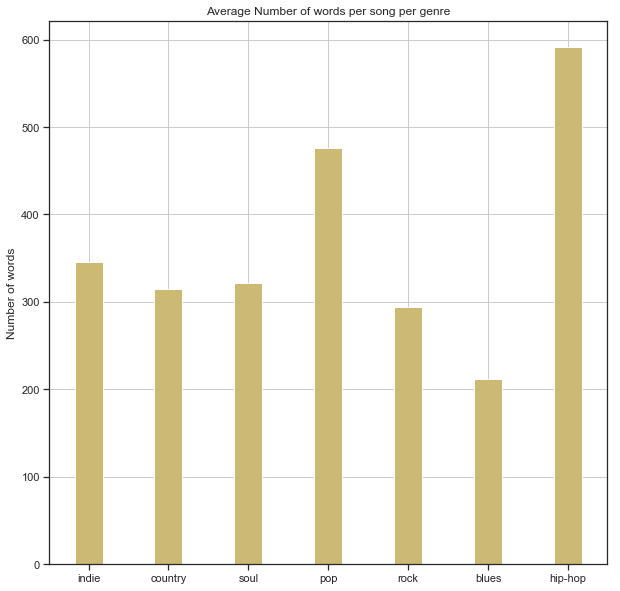

In [296]:
N = len(genre_list)
number_of_songs = tuple(number_of_songs_list)
words_per_song = tuple(words_per_song_list)
labels = tuple(genre_list)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=[10,10])
rects1 = ax.bar(ind + (width/2), words_per_song, width, color='y')

#rects2 = ax.bar(ind + width, number_of_songs, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of words')
ax.set_title('Average Number of words per song per genre')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)

ax.grid()

plt.show()

A few interesting insights can be offered through the representation above.

- Firstly we see that Hip-Hop is the undisputed winner of the wordiness contest. Having almost __3 times__ more words on average than Blues, the less wordy genre of them all and almost __2 times__ more than all other genres (with the exception of Pop). These results validate commonly held views about how  wordy genres can be.  
- Secondly, we see that Country, Soul, Rock and Indie have similar words per song.  We indentify Indie's mean to be a little higher, since Indie is an umbrella term that refers more to the way the music is released than the actual content. Thus, inside Indie one can find music of multiple genres which includes Indie Hip-Hop. As we see Hip-Hop is inherently wordy and thus the small increase in Indie.
- Finally, we notice another instance of a correlation between pop and hip hop. Pop seems to have a lot of words as does Hip-Hop. We will identify the reasons for this correlation as a lot of Hip-Hop songs are also included in the Pop charts. In the current music landscape, Pop includes a big catalogue of Hip-Hop songs.

### Most common Bigram and Trigram detection
Below, we will analyse the most common bigrams and trigrams in each genre as well as to the full corpus of lyrics. 

N-grams in our context have extra meaning. Aside from the fact that n-grams can  convey the main themes of each genre, they also help define the lyrical ways which artists use to create _rhythm_. We will call these collocations: __rhythm collocations__. It will be interesting to see if there are common such ways throughout genres or if artists differentiate themselves and their genres through distinctive collocations.

We could extend this solution to n-gram detection of interesting collocations with the definition of a fairly simple detection algorithm, by using the n-gram datasets by Google. It can be found [here](http://storage.googleapis.com/books/ngrams/books/datasetsv2.html).

Below we define a couple of utility functions.

In [297]:
def isNumber(s):
    """
    arguments: s: string
    returns: True if string is numeric, False otherwise
    """
    try:
        float(s)
        return True
    except ValueError:
        return False

def removeOutstandingNumbers(tokens):
    """
    This function finds the strictly numeric tokens and removes them
    
    arguments: tokens: list of strings
    returns: list of strings (tokens)
    """
    new_token_list = []
    for token in tokens:
        if (isNumber(token)):
            pass
        else:
            new_token_list.append(token)
    return new_token_list

We will assess if the pursuit of attaining bigrams is worthy by using an example for Blues which includes a smaller corpus word-wise, as we've found out above.

In [298]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
tokens = nltk.wordpunct_tokenize(full_string_dict['rock'])
tokens = removeOutstandingNumbers(tokens)
finder = BigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(bigram_measures.raw_freq)
sorted_scores = sorted(scored, key=lambda tup: tup[1])[::-1]
print(sorted_scores[0:10])

[(('I', 'm'), 0.009337125624782948), (('do', 'nt'), 0.005051015698152357), (('it', 's'), 0.003565164256920419), (('in', 'the'), 0.0032750275849638866), (('ca', 'nt'), 0.002905762729746482), (('I', 'll'), 0.0028705946482972056), (('It', 's'), 0.0026200220679711093), (('you', 're'), 0.002413409589456609), (('gon', 'na'), 0.002365053477463854), (('on', 'the'), 0.002176025039673992)]


We receive some initial results, but we recognise the need to refine the words that are used as part of bigram collocation. Thus, we introduce stopwords into the mix.

In [299]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
full_str = removeStopWordStr(full_string_dict['rock'])
tokens = nltk.wordpunct_tokenize(full_str)
tokens = removeOutstandingNumbers(tokens)
finder = BigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(bigram_measures.raw_freq)
sorted_scores = sorted(scored, key=lambda tup: tup[1])[::-1]
print(sorted_scores[0:10])

[((u'ca', u'nt'), 0.00484892054665894), ((u'And', u'I'), 0.004086004152025763), ((u'gon', u'na'), 0.003946625195313933), ((u'I', u'nt'), 0.003249730411754781), ((u'wan', u'na'), 0.0032130517389358784), ((u'I', u'got'), 0.0029856439674586814), ((u'Do', u'nt'), 0.0027949148688003874), ((u'I', u'ca'), 0.0027068860540350207), ((u'I', u'know'), 0.0024868140171216044), ((u'know', u'I'), 0.002332763591282213)]


The results seem to be closer to what we want, but we recognise the need to remove two things:
1. "I"s: Our current results seem too 'personal'. We will observe more meaningful results if we remove bigram collocations that include "I"
2. "nt"s: A token that derives from negation terms like "don't", "won't" etc. that needs to be cleared out

In [300]:
sorted_cleared_scores_I_nt = [tuple_ for tuple_ in sorted_scores if (tuple_[0][0] != 'I' and tuple_[0][0] != 'nt' and tuple_[0][1] != 'I' and tuple_[0][1] != 'nt')]

In [301]:
print(sorted_cleared_scores_I_nt[0:10])

[((u'gon', u'na'), 0.003946625195313933), ((u'wan', u'na'), 0.0032130517389358784), ((u'oh', u'oh'), 0.0016065258694679392), ((u'doo', u'doo'), 0.0015258327892663532), ((u'You', u'got'), 0.0012030604684600092), ((u'got', u'ta'), 0.0010710172463119594), ((u'You', u'know'), 0.001063681511748179), ((u'let', u'go'), 0.0010490100426206177), ((u'yeah', u'yeah'), 0.0008949596167812264), ((u'la', u'la'), 0.000755580660069396)]


In the same spirit we remove results that include 'na' (from terms like "wan'na" and "gon'na") and 'ta' (from terms like "got'ta")

In [302]:
sorted_cleared_scores_I_nt_na_ta = [tuple_ for tuple_ in sorted_cleared_scores_I_nt if (tuple_[0][0] != 'na' and tuple_[0][0] != 'ta' and tuple_[0][1] != 'na' and tuple_[0][1] != 'ta')]

In [303]:
print(sorted_cleared_scores_I_nt_na_ta[0:10])

[((u'oh', u'oh'), 0.0016065258694679392), ((u'doo', u'doo'), 0.0015258327892663532), ((u'You', u'got'), 0.0012030604684600092), ((u'You', u'know'), 0.001063681511748179), ((u'let', u'go'), 0.0010490100426206177), ((u'yeah', u'yeah'), 0.0008949596167812264), ((u'la', u'la'), 0.000755580660069396), ((u'Oh', u'oh'), 0.0006968947835591517), ((u'feel', u'like'), 0.0005795230305386629), ((u'Yeah', u'yeah'), 0.0005208371540284186)]


The final results see to be more descriptive of their genre and more meaningful.

We repeat the research for Trigrams using the limitations we've utilized above.

In [304]:
#we do the same for trigrams
from nltk.collocations import *
from nltk.corpus import stopwords 
trigram_measures = nltk.collocations.TrigramAssocMeasures()
stop_words = set(stopwords.words('english')) 
full_str = removeStopWordStr(full_string_dict['rock'])
tokens = nltk.wordpunct_tokenize(full_str)
tokens = removeOutstandingNumbers(tokens)
finder = TrigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(trigram_measures.raw_freq)
sorted_scores = sorted(scored, key=lambda tup: tup[1])[::-1]
sorted_cleared_scores_I_nt = [tuple_ for tuple_ in sorted_scores if (tuple_[0][0] != 'I' and tuple_[0][0] != 'nt' and tuple_[0][1] != 'I' and tuple_[0][1] != 'nt' and tuple_[0][2] != 'I' and tuple_[0][2] != 'nt')]
sorted_cleared_scores_I_nt_na_ta = [tuple_ for tuple_ in sorted_cleared_scores_I_nt if (tuple_[0][0] != 'na' and tuple_[0][0] != 'ta' and tuple_[0][1] != 'na' and tuple_[0][1] != 'ta' and tuple_[0][2] != 'na' and tuple_[0][2] != 'ta')]
print(sorted_cleared_scores_I_nt_na_ta[0:10])

[((u'doo', u'doo', u'doo'), 0.0011663817956411066), ((u'oh', u'oh', u'oh'), 0.0007995950674520794), ((u'la', u'la', u'la'), 0.0005648515614111019), ((u'Oh', u'oh', u'oh'), 0.0003447795244976856), ((u'Doo', u'doo', u'doo'), 0.000337443789933905), ((u'yeah', u'yeah', u'yeah'), 0.0003154365862425634), ((u'Let', u'live', u'life'), 0.00027142217885988014), ((u'ooh', u'ooh', u'ooh'), 0.00025675070973231906), ((u'live', u'life', u'Let'), 0.00025675070973231906), ((u'life', u'Let', u'live'), 0.00025675070973231906)]


We have successfuly found Bigram and Trigram collocations for Rock. We can quickly realise that there can be merit in this information, having validated that there exist _rhythm_ giving Bigrams and Trigrams (eg. _doo doo doo_, _oh oh oh_ etc.). It leaves to be determined if those collocations can give us a more direct insight on the message themes of each genre.

Based on the code above, we define functions to enact the research on all genres fiding the Top 20 Bigrams and Trigrams for each genre.

In [305]:
#then abstract into functions for the genres to use
def BigramColloc(full_text):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    stop_words = set(stopwords.words('english')) 
    full_str = removeStopWordStr(full_text)
    tokens = nltk.wordpunct_tokenize(full_str)
    tokens = removeOutstandingNumbers(tokens)
    finder = BigramCollocationFinder.from_words(tokens)
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    sorted_scores = sorted(scored, key=lambda tup: tup[1])[::-1]
    sorted_cleared_scores_I_nt = [tuple_ for tuple_ in sorted_scores if (tuple_[0][0] != 'I' and tuple_[0][0] != 'nt' and tuple_[0][1] != 'I' and tuple_[0][1] != 'nt')]
    sorted_cleared_scores_I_nt_na_ta = [tuple_ for tuple_ in sorted_cleared_scores_I_nt if (tuple_[0][0] != 'na' and tuple_[0][0] != 'ta' and tuple_[0][1] != 'na' and tuple_[0][1] != 'ta')]
    return sorted_cleared_scores_I_nt_na_ta

In [306]:
def TrigramColloc(full_text):
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    stop_words = set(stopwords.words('english')) 
    full_str = removeStopWordStr(full_text)
    tokens = nltk.wordpunct_tokenize(full_str)
    tokens = removeOutstandingNumbers(tokens)
    finder = TrigramCollocationFinder.from_words(tokens)
    scored = finder.score_ngrams(trigram_measures.raw_freq)
    sorted_scores = sorted(scored, key=lambda tup: tup[1])[::-1]
    sorted_cleared_scores_I_nt = [tuple_ for tuple_ in sorted_scores if (tuple_[0][0] != 'I' and tuple_[0][0] != 'nt' and tuple_[0][1] != 'I' and tuple_[0][1] != 'nt' and tuple_[0][2] != 'I' and tuple_[0][2] != 'nt')]
    sorted_cleared_scores_I_nt_na_ta = [tuple_ for tuple_ in sorted_cleared_scores_I_nt if (tuple_[0][0] != 'na' and tuple_[0][0] != 'ta' and tuple_[0][1] != 'na' and tuple_[0][1] != 'ta' and tuple_[0][2] != 'na' and tuple_[0][2] != 'ta')]
    return sorted_cleared_scores_I_nt_na_ta

In [307]:
def pp_ngram_result(genre, n_str, n_gram_result_sorted, num_res):
    print(genre)
    print('\t' + n_str)
    for n_gram in n_gram_result_sorted[0:num_res]:
        n_gram_str = ""
        for word in n_gram[0]:
            n_gram_str += word + " "
        print('\t\t' + n_gram_str)

In [308]:
for genre, genre_str in full_string_dict.iteritems():
    genre_bigrams = BigramColloc(genre_str)
    pp_ngram_result(genre, 'Bigrams', genre_bigrams, 20)
    genre_trigrams = TrigramColloc(genre_str)
    pp_ngram_result(genre, 'Trigrams', genre_trigrams, 20)

full
	Bigrams
		yeah yeah 
		You know 
		oh oh 
		let go 
		You got 
		feel like 
		Yeah yeah 
		love love 
		la la 
		Oh oh 
		ooh ooh 
		oh yeah 
		Oh yeah 
		We got 
		You ca 
		baby baby 
		She said 
		go go 
		make feel 
		every time 
full
	Trigrams
		yeah yeah yeah 
		oh oh oh 
		la la la 
		Yeah yeah yeah 
		Oh oh oh 
		love love love 
		doo doo doo 
		ooh ooh ooh 
		Round round go 
		go go go 
		da da da 
		dip make dip 
		Ooh ooh ooh 
		zum zum zum 
		yeah Yeah yeah 
		ay ay ay 
		ah ah ah 
		baby baby baby 
		La la la 
		hey hey hey 
indie
	Bigrams
		oh oh 
		You know 
		let go 
		You got 
		yeah yeah 
		la la 
		got love 
		feel like 
		love love 
		Oh oh 
		Yeah yeah 
		good good 
		make feel 
		tell em 
		ooh ooh 
		go go 
		You could 
		ah ah 
		get away 
		know got 
indie
	Trigrams
		oh oh oh 
		la la la 
		Oh oh oh 
		yeah yeah yeah 
		go go go 
		ah ah ah 
		OK OK OK 
		good good good 
		Yeah yeah yeah 
		love love love 
		da da da 
		Keep gold chain 
		baby baby baby 

The results above are very interesting and they successfuly validate our assumptions that bigram and trigram (especially the latter) can provide a quick but deep insight on main themes of a genre.

Specificaly:
- Results that regard the __full corpus__ of lyrics are almost completely rhythm collocations, as admittedly those collocations are among the most used across all genres.
- __Indie__: Apart from the rythm collocations, one can find those that underline a youthful escapism attitude which can be summarised with collocations like: get away, run Ima run
- __Country__: This genre has some very interesting results. We see the two lists to be populated almost exclusively by meaning collocations. These can include the very distinctive bigrams: hillbilly hillbilly, Friday night, small town  as well as the entertaining trigrams: hillbilly hillbilly hillbilly, batter batter swing, Ima keep redneck, red red red, ice cold beer. One can, quickly, recognize the lifestyle choices that Country music represents.
- __Soul__: The genre's analysis is rhythm collocation-heavy. Regardless one can identify a few collocations that are characteristic of the cultural context of the genre, like: ghetto ghetto ghetto, day lovely day, black black 
- __Pop__: The genre includes mostly rhythm collocations. Even if the bigrams and trigrams deviate from that, they represent more the theme of the song (and its digestivity) through repetition, rather than an overall directive of the genre. Some examples of that are low low low, ring ring ring, work work work.
- __Rock__: This genre has rhythm collocations almost exclusively. 
- __Blues__: This, also, is a genre with a mix of rhythm and meaning collocations. For the latter category, one can recognize the following to be characterstic of the style and thematology of the genre: chain chain , Lord Lord Lord, like makin love, Slow ride take
- __Hip-Hop__: This genre features some interesting meaning collocations. Aside from explicit ones (which we will focus on afterwards), one can focus on: Green Gucci suit, win win win, fight fight fight. It is interesting that this is the only genre with a brand name in its Top 20 of collocations. 

It is important to note that in some cases, meaningful collocations are pushed at the end of the Top 20 list, because of the frequency of rythm collocations. At the same time, bigram and trigram collocations can be hard to come by and if one song has a lot of repetition of a collocation, this can reach the Top 20.

### Listening to all songs at once
#### Most Frequent Terms and TF-IDF
Continuing our journey using our created tools, we will try to validate an important assumption:

> Songs, after all, are not that different. If you hear a song that belongs to a genre, it's like you've listened to the whole of it.

This arbitrary assumption can be tough to deal with, as most arbitrary things. Vagueness can be a big obstacle to overcome, because it can assume all forms and none.

We will try to tackle this by: 
1. Calculating the frequency of all terms of a genre
2. Calculating the TF-IDF rating for all terms of a genre
3. Rendering two word-clouds per genre: one, using the word-frequency and a second one using the TF-IDF metric
4. If the word-frequency wordcloud contains the most meanigful words (leaving us as judges of that) and the information in the TF-IDF word-cloud are insignificant and won't make all the difference inside the context of a song, then it means that the assertion above is correct. Otherwise, it will be invalidated.

It is important to note that we recognize that the expected TF-IDF word-cloud won't include too frequent terms. That is after all the function of TF-IDF: provide us with the results that differentiate each document from its similar ones. It is based on the significance of those differences that we will conclude if the assumptions holds true.

Concequently, we create a dictionary which holds the frequencies of the terms in each genre:

In [309]:
word_freq_dict = {}
for genre, genre_str in full_string_dict.iteritems():
#     print(genre)
    #change to list because FreqDist wants it
    genre_str_to_list = genre_str.split()
    word_freq_dict[genre] = nltk.FreqDist(genre_str_to_list)
#     print(word_freq_dict[genre])

Below the tf and idf scores is calcultated for every term and all of them are then pushed into the respective dictionaries.

The calculations are as follows:
- TF will be the term frequency of every term, calculated by: $tf(t,d) = f_{t,d}$
- IDF will be calculated based on the following formula: $idf(t, D) = \log\frac{N}{|\{d\in D: t\in D\}|}$ where:
    - $N$ is the number of documents 
    - $|\{d\in D: t\in D\}|$ is the number of documents the term $t$ appears in
- Finally TF IDF is calculated as: $tfidf(t, d, D) = tf(t, d) * idf(t, D)$

It is important to note that on a TF IDF calculation for $D$ documents the number of $tf$ dictionaries is going to be equal to the number of documents, whereas the $idf$ dictionary is singular. This is evident from the equations used above. The same way, the $tf$ dict is calculated per document.

In this context, tf is essentialy the term frequency taken from *FreqDist*, so just the idf is calculated below. Additionaly a document is defined as the full corpus of the song lyrics of a genre.

In [310]:
# In this setting, tf_dict_genre is essentialy word_freq_dict[genre]
idf_dict = {}

In [311]:
for genre, genre_freq_dist in word_freq_dict.iteritems():
    for term in genre_freq_dist:
        if (not(term in idf_dict)):
            idf_dict[term] = 1
        else:
            idf_dict[term] += 1
number_of_documents = len(word_freq_dict.keys()) #this also INCLUDES full!
for term, document_count in idf_dict.iteritems():
    idf_dict[term] = math.log((number_of_documents/abs(idf_dict[term])), 10)

Below we calculate the TF-IDF scores per term per genre.

In [312]:
tf_idf_dict = {}
for genre, genre_freq_dist in word_freq_dict.iteritems():
    if (not(genre in tf_idf_dict)):
        tf_idf_dict[genre] = {}
    for term in genre_freq_dist:
        tf_idf_dict[genre][term] = genre_freq_dist[term] * idf_dict[term]

Furthermore, we currently have the full lyrics for the TF-IDF and TF calculation. This means that the wordcloud results will be plagued by very common words and terms that won't produce meaningful conclusions. Thus, we construct a stopwords list, based on NLTK's list.

In [313]:
wc_stop_words = list(stop_words)
wc_stop_words.append('nt')
wc_stop_words.append('wa')
wc_stop_words.append('na')
wc_stop_words.append('em')
wc_stop_words.append('ai')
wc_stop_words.append('gon')
wc_stop_words = set(wc_stop_words)

Finally, we are creating the corresponding wordclouds for each genre.

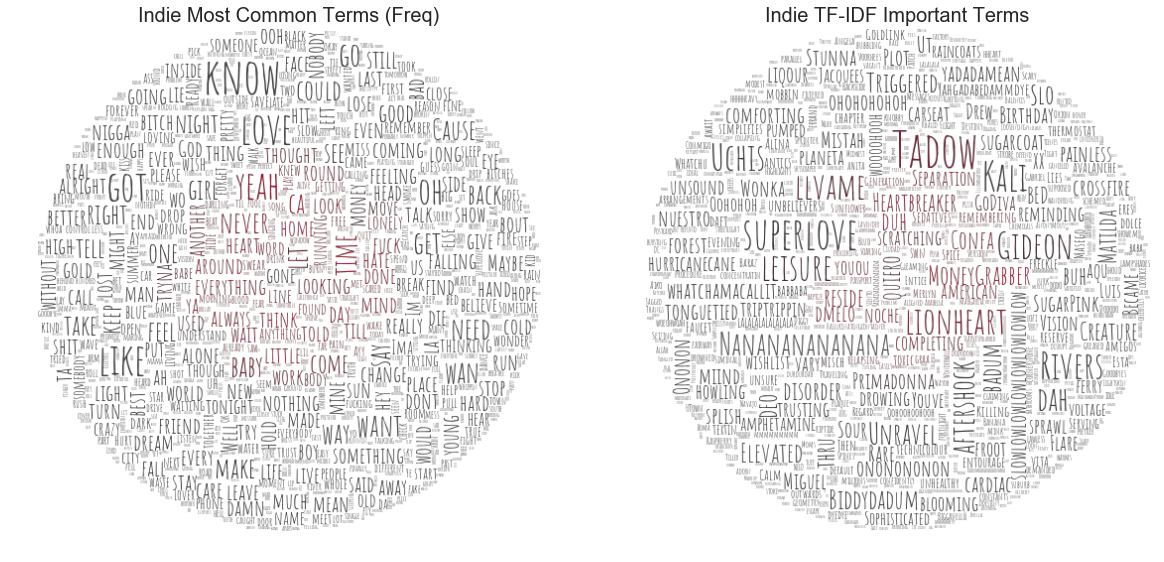

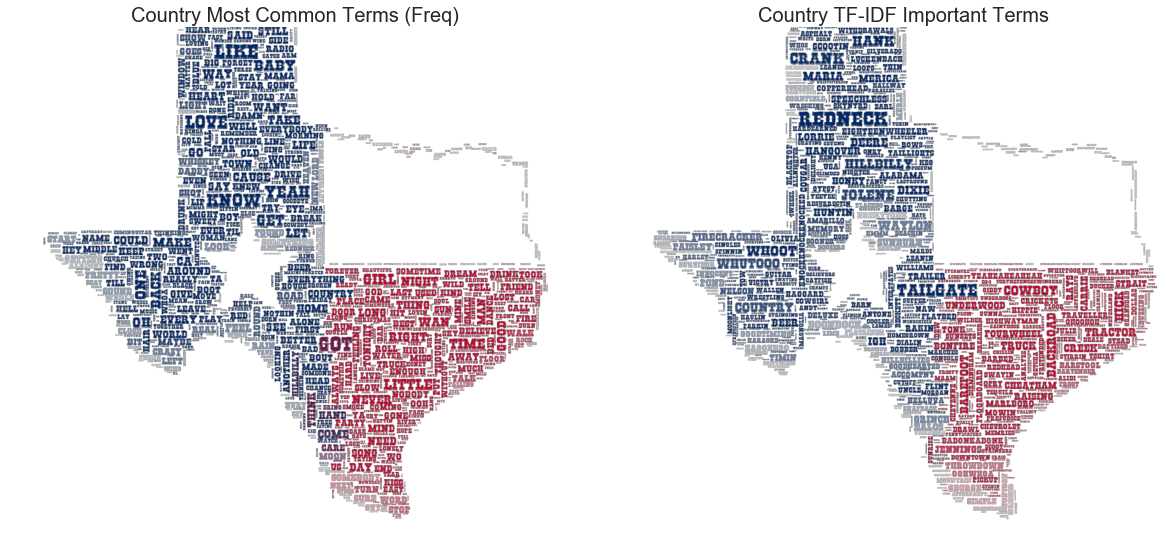

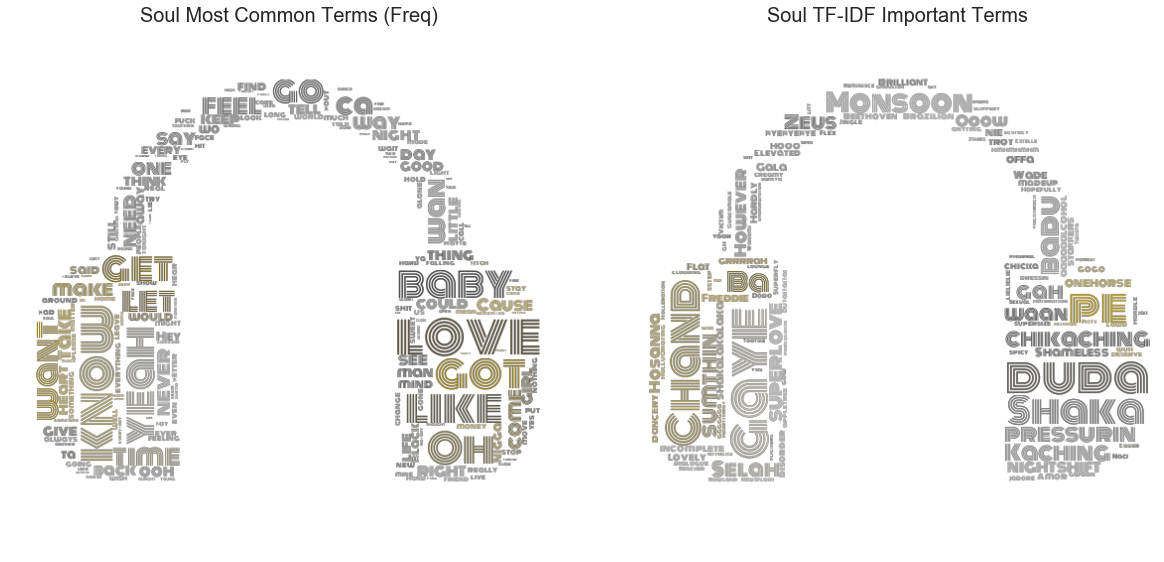

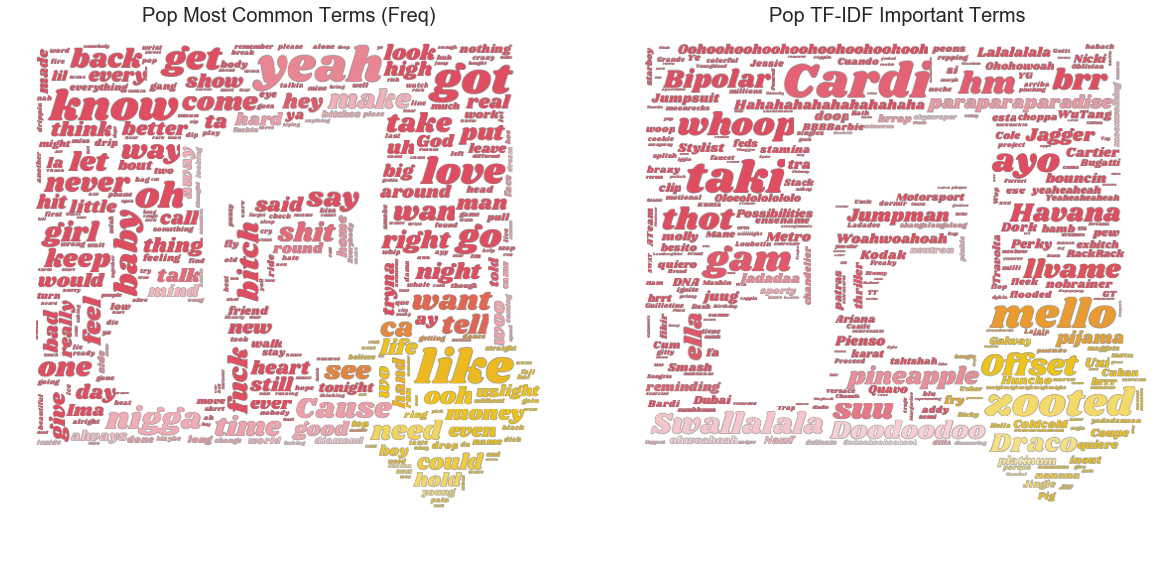

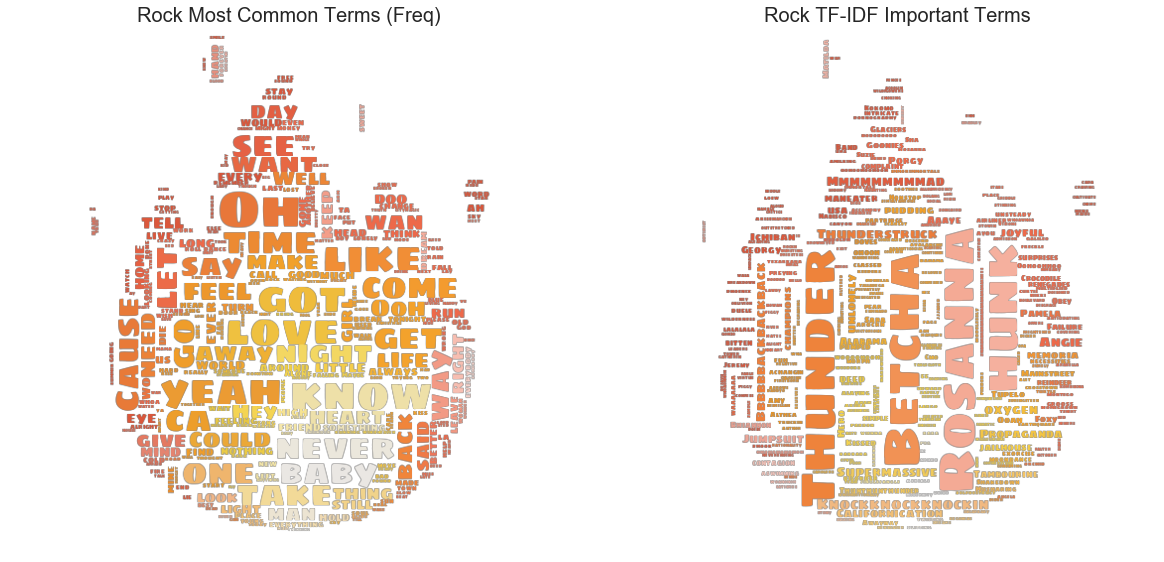

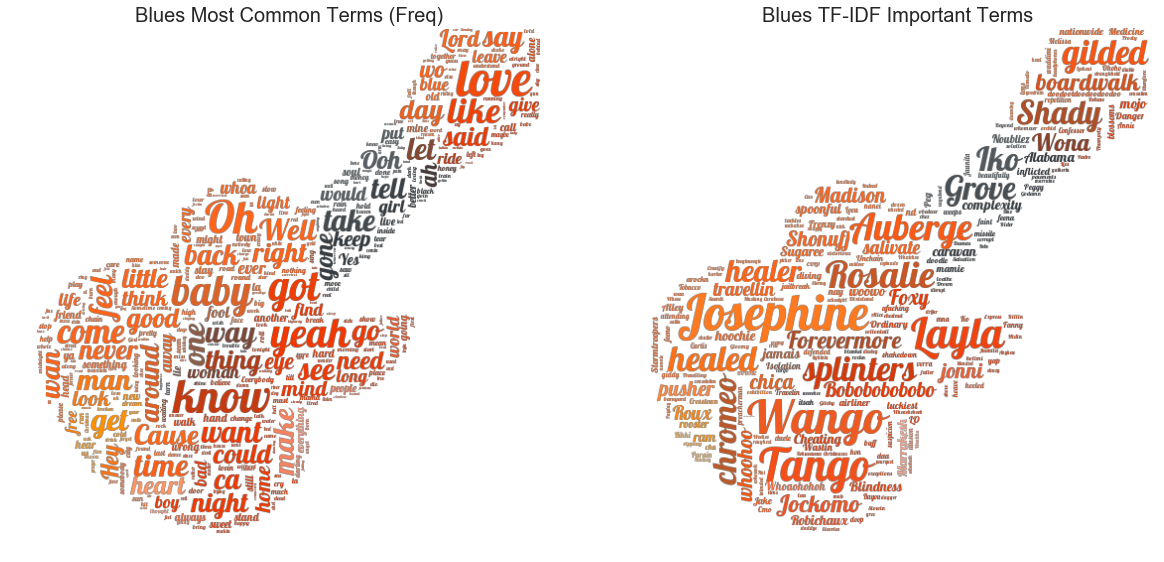

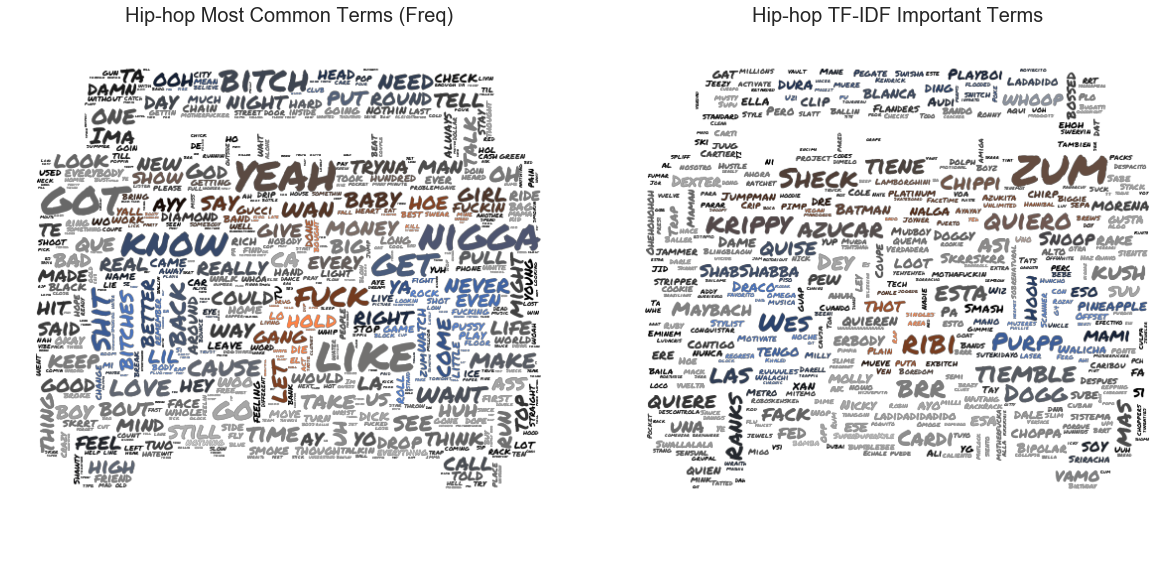

In [314]:
for genre in word_freq_dict.keys():
    if (genre == 'full'):
        continue
    genre_str_normal = ""
    genre_str_tf_idf = ""
    for term in word_freq_dict[genre].keys():
        genre_str_normal += (term + " ") * int(round(word_freq_dict[genre][term], 0))
    for term in tf_idf_dict[genre].keys():
        genre_str_tf_idf += (term + " ") * int(round(tf_idf_dict[genre][term], 0))
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    if (genre == 'country'):
        genre_mask = np.array(Image.open(path.join(d, "./wc/tfidf/" + genre +"_rgb.jpg")))
    else:
        genre_mask = np.array(Image.open(path.join(d, "./wc/tfidf/" + genre +"_rgb.png")))
    #Create wordcloud object


    wc = WordCloud(mode='RGBA', collocations=False, background_color=None, max_words=10000, mask=genre_mask, 
                   stopwords = wc_stop_words, max_font_size=50, random_state=42, font_path='./fonts/' + genre + '.ttf')

    #Generate word cloud
    
    

    fig = plt.figure(figsize=[20,20])
#     fig.subplots_adjust(hspace=0.4, wspace=0.6)
    ax = fig.add_subplot(1,2,1)
    ax.set_title(genre.capitalize() + " Most Common Terms (Freq)", fontsize = 20)
    wc.generate(genre_str_normal)

    #Base the colors of the wordcloud to the colors of the image
    image_colors = ImageColorGenerator(genre_mask)
    #Change figure size

    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")

    ax = fig.add_subplot(1,2,2)
    ax.set_title(genre.capitalize() + " TF-IDF Important Terms", fontsize = 20)
    #Generate word cloud
    wc.generate(genre_str_tf_idf)

    #Base the colors of the wordcloud to the colors of the image
    image_colors = ImageColorGenerator(genre_mask)
    #Change figure size
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
#     fig.subplots_adjust(hspace=0.1, wspace=2)
    _=plt.show()
        

Our results are mixed but based on our method we can derive some very interesting results.

We can divide genres in to two categories:
1. _Photocopier_ genres: These genres seem to have less than meaningful differences between their songs
2. _Parthenogenesis_ genres: These genres seem to have meaningful differences between their songs

A general rule to set a genre as _Photocopier_, is if the TF-IDF wordcloud includes mostly names and/or rhythm collocations. This means that the actual gist of the song is comprised of in-genre common elements and only the nomenclature (the naming and rhythm sections in songs) change.

Let's analyse each genre based on the categorization above:
- __Indie__: It appears to be a _Photocopier_ genre. In general we notice that both wordclouds include trivial results. The frequency wordcloud is created off terms that are coming up in all genres. The TF-IDF wordcloud is comprised of names, rhythm collocations but also some words that are part of the hook of the song. These words are abstract (eg. Lionheart, Superlove, Aftershock etc.)
- __Country__: A _Parthenogenesis_ genre. Although the frequency wordcloud is based on terms that exist in most other genres, TF-IDF's wordcloud gives some very interesting results. One can recognize distinctive words that consist of a plularity of themes. Words like this are: redneck, tailgate, crank - hank, cowboy, country, truck, tractor. These results give us a good idea on what Country is talking about.
- __Soul__: This, also, appears as a _Photocopier_ genre. Its TF-IDF wordcloud is comprised off names and rhythm collocations. It is interesting to note the creativity, difference and uniqueness of those rhythm collocations, which don't come up in other genres. Some examples are: duda shaka, badu (which comes up in repetitions throughout songs), chikaching.
- __Pop__: A _Photocopier_ genre. We can notice with a quick glance that the TF-IDF wordcloud includes names of people and of __quick core elements__ of the song. A __quick core element__ is an element of a song which holds little value in terms of characterization of the artist and song based on meaning but effectively differentiates a song from the next one. A good example for that is: pineapple. This word (and other _core elements_) do not characterize its artist (it is not an artist that talks about pineapples or fruit per se - the genre doesn't as well) but since nobody else has a song about pineapples, that song can __quickly__ become a distinctive, __core__ element of the artist's catalogue. __Quick core elements__ are often part of _Photocopier_ genres.
- __Rock__: A _Parthenogenesis_ genre. Words like: Thunder, Rosana and Propaganda come up in the TF-IDF wordcloud.
- __Blues__: Although Blues is a _Photocopier_ genre, it's entertaining to see the TF-IDF include a lot of female names, implying similar love songs written but for different women. Names like this are: Josephine, Layla, Rosalie, Madison 
- __Hip-Hop__: As we've noted before, this genre shares a lot conclusions with _Pop_. It is a _Photocopier_ genre but its TF-IDF wordcloud holds mostly names like: Snoop, Dogg, Krippy, Maybach etc.

Overall we can derive some very popular words based on all frequency wordclouds, like: Yeah, Like, Love, Know, Got, Get, Baby.

Finally we can, again recognise a correlation between Indie and Hip-Hop especially through the explicit terms on both their wordclouds. 

### New words for me
#### Lexical wealth
Below we will attempt to find how lexically wealthy each genre is. This will be done very simply, by outputting the number of sample in the respective frequency dictionaries. We could include a weight metric for this, based on the number of each term comes up, but this isn't our focus at the moment.

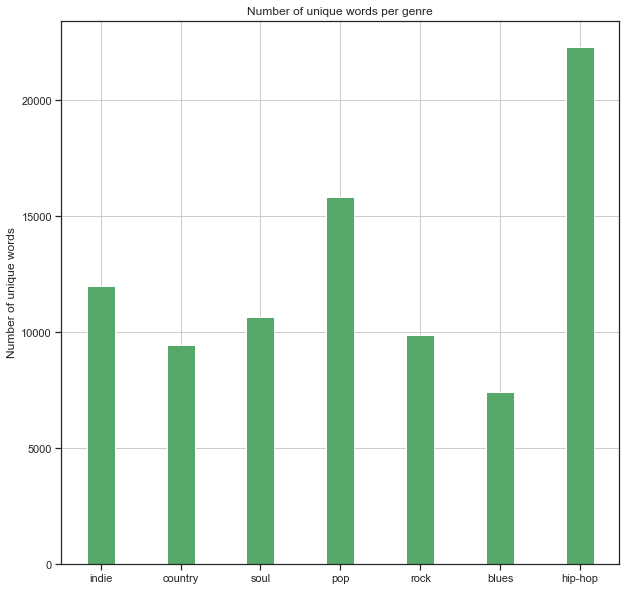

In [315]:
genre_list = []
number_of_unique_songs = []
for genre in word_freq_dict.keys():
    if (genre != 'full'):
        genre_list.append(genre)
        number_of_unique_songs.append(len(word_freq_dict[genre].values()))

N = len(genre_list)
number_of_unique_songs = tuple(number_of_unique_songs)
labels = tuple(genre_list)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=[10,10])
rects1 = ax.bar(ind + (width/2), number_of_unique_songs, width, color='g')

#rects2 = ax.bar(ind + width, number_of_songs, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of unique words')
ax.set_title('Number of unique words per genre')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)

ax.grid()

plt.show()

We see that the results largely correlates with the 'Average Number of words per song per genre'. Hip-Hop is the most lexical diverse, where blues is the least diverse. 

### You seem similar to me
#### Cosine similarity and other metrics on the lyric space
It is time we end our assumptions and see if they hold true or not. 

To do that we will attempt to find the similarity between the full corpuses of each genre. We have two metrics:
1. TermDiffFreqDist: This simple measure was devised during our research. It attempts to find difference based on the difference $|A-B|$ where $A$ is the mean of the mean differences of each term's frequency across all genres and $B$ is the total mean of the means of term frequency across genres. If the difference is close to $B$, then it signifies that there are no significant differences across genres.
2. Cosine similarity: The golden standard for these kind of procedures (and rightfully so). It vectorizes each document and defines difference as the angle between each vector (does not accomodate for significant repetition of terms inside songs  - for that we could use the Euclidean distance). 

Below we are defining TermDiffFreqDist (please scroll to the conclusions based on that before reading through the code).

In [331]:
def getTermMeanDiffFreqDist(term, keys):
    current_term_diff_list = []
    for index in range(0, len(keys)):
        if (keys[index] == 'full'):
            continue
        current_index = index + 1
        while(current_index < len(keys)):
            current_term_diff_list.append(abs(word_freq_dict[keys[index]][term] - word_freq_dict[keys[current_index]][term]))
            current_index += 1
    #print('1 - {}'.format(current_term_diff_list))
    return sum(current_term_diff_list)/float(len(current_term_diff_list))

def getMeanTermFreq(term, keys):
    current_term_diff_list = []
    for index in range(0, len(keys)):
        if (keys[index] == 'full'):
            continue
        current_term_diff_list.append(word_freq_dict[keys[index]][term])
    #print('2 - {}'.format(current_term_diff_list))
    return sum(current_term_diff_list)/float(len(current_term_diff_list))

In [332]:
keys = word_freq_dict.keys()
term_dist_dict = {}
term_dist_list = []
term_dist_dict_mean = {}
term_dist_list_mean = []
most_frequent_full = word_freq_dict['full'].most_common(200)
most_frequent_list = [x[0] for x in most_frequent_full]
for term in most_frequent_list:
    term_dist_dict[term] = getTermMeanDiffFreqDist(term, keys)
    term_dist_list.append(term_dist_dict[term])
for term in most_frequent_list:
    term_dist_dict_mean[term] = getMeanTermFreq(term, keys)
    term_dist_list_mean.append(term_dist_dict[term])

print('Mean dist of top words based on genre: {}'.format(sum(term_dist_list)/len(term_dist_list)))
print('Mean frequency of top words based on genre: {}'.format(sum(term_dist_list_mean)/len(term_dist_list_mean)))

Mean dist of top words based on genre: 479.856666667
Mean frequency of top words based on genre: 479.856666667


Apparently both metrics come up the same. We did not have time to conclude if this because of a logical error on the code or due to a math theorem and, thus the code above is left as reference for future implementation beased on our proposed metric.

### An ocean of feelings and then some more
It is time we went more deeply into the features of our text. To do that we will need some extra functions to manipulate our data. 
#### Addtional tools to derive results for Sentiment, Explicitness, Grammar Tagging and Brand Representation Analysis
Below we define a series of utility functions to handle our data dictionaries.
Please note that in some cases the naming can be poor - that is because these functions where initialy created to server Expliciteness analysis but then it went on to the other analyses as well.

In [333]:
def aggregateSwearResults(swear_list_of_dicts):
    #receives a list of dicts and returns a total dictionary with the sum of values of each dictionary
    # it creates a union of the keys (NOT an intersection)
    total_swear_dict = {}
    for swear_dict in swear_list_of_dicts:
        for swear in swear_dict.keys():
            if (swear in total_swear_dict):
                total_swear_dict[swear] += swear_dict[swear]
            else:
                total_swear_dict[swear] = swear_dict[swear]
    return total_swear_dict

def aggregateListLenResults(list_of_dicts):
    # receives a list of dicts of lists
    # returns a total dictionary with the sum of lengths of the lists of each dictionary
    # it creates a union of the keys (NOT an intersection)
    #list of dicts of lists to dict of lengths of the lists
    total_dict = {}
    for _dict in list_of_dicts:
        for element in _dict.keys():
            if (element in total_dict):
                total_dict[element] += len(_dict[element])
            else:
                total_dict[element] = len(_dict[element])
    return total_dict

def genreSwearListToDFForJointPlot(total_swear_dict, genre):
    # receives a total dictionary with terms as keys and values the time the term comes up inside 
    # the corpus of the passed genre
    # returns tuple (x,y) where
    # x: list of genre elements 
    # y: list of term such that x: (x0, x1, x2, ...) and y: (y0, y1, y2, ...)
    genre_total_swear_list_x = []
    genre_total_swear_list_y = []
    for swear in total_swear_dict.keys():
        for times in range(0, total_swear_dict[swear]):
            #appended by the times the swear comes up
            genre_total_swear_list_x.append(genre)
            genre_total_swear_list_y.append(swear)
    return (genre_total_swear_list_x, genre_total_swear_list_y)

def aggregateGenreXYForJointPlot(xy_list):
    #receives a list [(x,y), (x', y'), (x'', y''), ...] of (x,y) tuples where
    # x: list of genre elements 
    # y: list of term such that x: (x0, x1, x2, ...) and y: (y0, y1, y2, ...)
    # each tuple corresponds to a genre
    # returns a total tuple (xt, yt) where xt: x extended by x' extended by x'' and likewise for yt
    
    total_x = []
    total_y = []
    for xy in xy_list:
        total_x.extend(xy[0])
        total_y.extend(xy[1])
    return (total_x, total_y)

def categoriesToNumbers(xy_tuple, category_list, counter_list, brand_category_list, brand_counter_list):
    # xy_tuple: a total tuple (xt, yt) (check genreSwearListToDFForJointPlot() and aggregateGenreXYForJointPlot() documentation)
    # category_list: a list including the genres
    # counter_list: a list including integers that correspond to genres
    # brand_category_list: a list including the brands
    # brand_counter_list: a list including integers that correspond to brands
    # returns a new total tuple (xn, yn) such that for every instance of a genre in xt, there is its corresponding number
    # and for every instance of brands in yt, there is its corresponding brand number based on the respective lists
    new_x = []
    new_y = []
    x = xy_tuple[0]
    y = xy_tuple[1]
    cat_counter_dict = {}
    for index in range(0, len(counter_list)):
        cat_counter_dict[category_list[index]] = counter_list[index]
    for index in range(0, len(x)):
        new_x.append(cat_counter_dict[x[index]])
    
    brand_cat_counter_dict = {}
    for index in range(0, len(brand_counter_list)):
        brand_cat_counter_dict[brand_category_list[index]] = brand_counter_list[index]
    for index in range(0, len(y)):
        new_y.append(brand_cat_counter_dict[y[index]])
    return(new_x, new_y)
    

def createVocab(genre_agg_swear_dict):
    #receives a genre dict which includes a dictionary of all terms
    #returns a list including all the unique terms
    vocab_list = []
    for genre in genre_agg_swear_dict.keys():
        for swear in genre_agg_swear_dict[genre].keys():
            vocab_list.append(swear)
    #turn to set and then back to list - faster instead of in
    vocab_set = set(vocab_list)
    vocab_list = list(vocab_set)
    return vocab_list

def genreTotalSwearDictToDictOfLists(genre_agg_swear_dict):
    # takes an genre_agg_swear_dict 
    # returns a dictionary with keys each term in the vocabulary and value a list which includes
    # the number of times the term comes up in each genre
    
    vocab_list = createVocab(genre_agg_swear_dict)
    # it includes a list for every swear which in index n holds the number the swear comes up in genre n
    swear_list_dict = {}
    for genre in genre_agg_swear_dict.keys():
        for vocab_swear in vocab_list:
            if (not(vocab_swear) in swear_list_dict):
                swear_list_dict[vocab_swear] = []
            try:
                swear_list_dict[vocab_swear].append(genre_agg_swear_dict[genre][vocab_swear])
            except:
                swear_list_dict[vocab_swear].append(0)
    return swear_list_dict

Below we have will prepare our data based on the functions defined above.

It can be a challenging code segment to go through as we are defining dictionaries for all analyses that are going to follow.

The code is structured in three parts:
- __Artist Level Handling__: In this part we build aggregated versions of dictionaries from Song level to Artist level
- __Genre Level Handing__: In this part we build aggregated versions of dictionaries from Artist level to Genre level
- __Plotting Level Handing__: In this part we build dictionaries and lists to conduct plotting of each analyses in the coming cells.

It is coded this way to avoid going through __for__ loops again and again, which can be visible in bigger datasets. Such provisions are present throughout the code as this is built with the mindset of being able to work with big datasets also.

Furthermore the specific handling of each section of the analysis is required because of the different tools we will use to plot.

In [334]:
###ARTIST LEVEL HANDLING

artist_sentiment_dict = {}
artist_sentiment_keep_dict = {}
artist_word_count_dict = {}

artist_swear_words_dict = {}
artist_agg_swear_words_dict = {}

artist_text_analysis_dict = {}

artist_brand_dict = {}

#make word count list per artist(artist_word_count_dict), 
#sentiment list per artist (artist_sentiment_keep_dict), 
#mean of sentiment per artist (artist_sentiment_dict)
#artist swaer dict list for all songs per artist (artist_swear_words_dict)
#aggregated swear dict (one dict with all results in) per artist (artist_agg_swear_words_dict)
#includes list of dicts for lexical analysis for every artist(artist_text_analysis_dict)
#includes list of strings (brands) for every artist (artist_brand_dict)


for artist, artist_song_dict in full_text_analysis_dict.iteritems():
    artist_sentiment_list = []
    artist_word_count_list = []
    artist_swear_dict_list = []
    artist_text_analysis_dict_list = []
    artist_brand_dict_list = []
    
    for song, song_dict in artist_song_dict.iteritems():
        artist_sentiment_list.append(song_dict['sentiment'])
        artist_word_count_list.append(song_dict['word_count'])
        artist_swear_dict_list.append(song_dict['tags_dict']['swear'])
        artist_text_analysis_dict_list.append(song_dict['tags_dict']['linguistic'])
        artist_brand_dict_list.append(song_dict['tags_dict']['brands'])
    try:
        artist_sentiment_dict[artist] = sum(artist_sentiment_list)/len(artist_sentiment_list)
        artist_sentiment_keep_dict[artist] = artist_sentiment_list
        artist_word_count_dict[artist] = artist_word_count_list
        artist_swear_words_dict[artist] = artist_swear_dict_list
        artist_agg_swear_words_dict[artist] = aggregateSwearResults(artist_swear_dict_list)
        artist_text_analysis_dict[artist] = artist_text_analysis_dict_list
        artist_brand_dict[artist] = artist_brand_dict_list

    except:
        pass
        #print("{} modulo zero - no sentiment".format(artist))


### GENRE LEVEL HANDLING

genre_sentiment_dict = {}
# includes genres as keys and a list of lists of the sentiments per artist in genre as values (genre_sentiment_dict)
genre_word_count_dict = {}
# includes genres as keys and a list all word count taken per artist in genre as values (genre_word_count_dict)
genre_swear_dict = {} 
# includes genres as keys and a list of lists of dictionaries each dictionary taken per artist in genre as values (genre_swear_dict)
genre_agg_swear_dict = {}
# includes genres as keys and a list of dictionaries each dictionary taken per artist in genre as values (genre_agg_swear_dict)
genre_text_analysis_dict = {}
# includes genres as keys and a list of dicts with text analysis data taken per artist in genre as values (genre_text_analysis_dict)
genre_brand_dict = {}
#includes lists of lists of dicts of lists (one list per artist which includes brand dict for every song) (genre_brand_dict)

for index, row in artists_df.iterrows():
    artist_id = row['Artist_id']
    artist_genre = row['Genre']
    if (artist_genre in genre_sentiment_dict):
        try:
            genre_sentiment_dict[artist_genre].append(artist_sentiment_dict[artist_id])
            genre_word_count_dict[artist_genre].extend(artist_word_count_dict[artist_id])
            genre_swear_dict[artist_genre].append(artist_agg_swear_words_dict[artist_id])
            genre_text_analysis_dict[artist_genre].append(aggregateSwearResults(artist_text_analysis_dict[artist_id]))
            genre_brand_dict[artist_genre].append(artist_brand_dict[artist_id])
        except:
            pass
            #print('{} absent due to modulo zero'.format(artist_id))
    else:
        try:
            genre_sentiment_dict[artist_genre] = [artist_sentiment_dict[artist_id]]
            genre_word_count_dict[artist_genre] = []
            genre_word_count_dict[artist_genre].extend(artist_word_count_dict[artist_id])
            genre_swear_dict[artist_genre] = [artist_agg_swear_words_dict[artist_id]]
            genre_text_analysis_dict[artist_genre] = []
            genre_text_analysis_dict[artist_genre].append(aggregateSwearResults(artist_text_analysis_dict[artist_id]))
            genre_brand_dict[artist_genre] = []
            genre_brand_dict[artist_genre].append(artist_brand_dict[artist_id])
        except:
            pass
            #print('{} absent due to modulo zero2'.format(artist_id))
            
###PLOTTING LEVEL HANDLING

full_sentiment_list = []
#make sentiment list per genre (from mean of each artist), (full_sentiment_list)

for key, sent_list in genre_sentiment_dict.iteritems():
    full_sentiment_list.extend(sent_list)

genre_agg_swear_total_list_xy = []
# makes swear results into a list (one element per genre) where each element is a (x,y) tuple per the specification of the creating functions
genre_to_plot_category_list = []
# genre_to_plot_category_list: a list including the genres
category_count = 1
categories = []
# categories: a list including integers that correspond to genres
for genre, genre_swear_list in genre_swear_dict.iteritems():
    genre_agg_swear_dict[genre] = aggregateSwearResults(genre_swear_list)
    genre_to_plot_category_list.append(genre)
    categories.append(category_count)
    category_count += 1

swear_list_dict = genreTotalSwearDictToDictOfLists(genre_agg_swear_dict)
# swear_list_dict includes a list for every swear which in index n holds the number the swear comes up in genre n


genre_aggregated_text_analysis_dict = {}
# includes genres as keys and a dictionary with grammar tags (derived from all artists of a genre) as value(genre_aggregated_text_analysis_dict)

for genre in genre_text_analysis_dict.keys():
    genre_aggregated_text_analysis_dict[genre] = aggregateSwearResults(genre_text_analysis_dict[genre])

genre_text_analysis_vocab = createVocab(genre_aggregated_text_analysis_dict)
#a list which inludes all terms used inside all genres

text_analysis_list_dict = genreTotalSwearDictToDictOfLists(genre_aggregated_text_analysis_dict)

#genre_brand_dict is a dict of lists of lists of dicts of lists
# (genre->artist->song(dictionary of brands)->category of brands(list of brands mentioned))

brand_dict = {}
#includes genres as keys and (a dictionary with every brand category as key and the number of times a brand from this category was mentioned as values) as values
for genre in genre_brand_dict.keys():
    genre_brand_category_count_list_of_dicts = []
    for artist_list in genre_brand_dict[genre]:
        artist_brand_category_count_dict = aggregateListLenResults(artist_list)
        genre_brand_category_count_list_of_dicts.append(artist_brand_category_count_dict)
    brand_dict[genre] = aggregateSwearResults(genre_brand_category_count_list_of_dicts)

xy_list = []
#includes (x,y) tuples for plotting (one tuple per genre). x:genres as strings, y: brand categories as strings 
for genre in brand_dict.keys():
    xy_list.append(genreSwearListToDFForJointPlot(brand_dict[genre], genre))

brand_to_plot_category_list = []
# brand_to_plot_category_list: a list including the brand categories
brand_category_count = 1
brand_categories = []
# brand_categories: a list including integers that correspond to brand categories
for genre in brand_dict.keys():
    for brand_cat in brand_dict[genre].keys():
        brand_to_plot_category_list.append(brand_cat)
        brand_categories.append(brand_category_count)
        brand_category_count += 1
    break
    
xy = aggregateGenreXYForJointPlot(xy_list)
xy = categoriesToNumbers(xy, genre_to_plot_category_list, categories, brand_to_plot_category_list, brand_categories)
#final version to plot, check aggregateGenreXYForJointPlot() and categoriesToNumbers() for documentation

#### Sentimental analysis: Feelings of Love and Hate at Spotify's Top of the Top
It is time to analyse the sentiment presented in the data we have and reach some long awaited conclusion.

We have admittedly indulged into including a song that successfully captures the current objective's essence and we recommend you have a listen through it as you read our research conclusions. This is __Nina Simone__ in 1976 Montreaux Jazz Festival performing ___Feelings___.

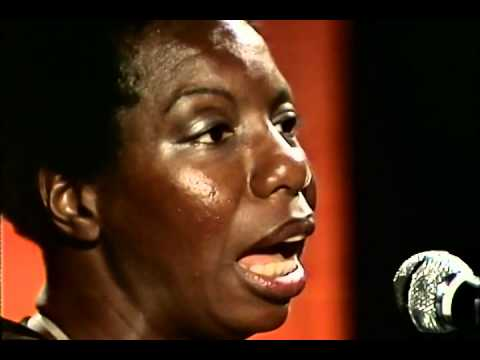

In [335]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('C2IKm9gGipY')

Below we plot the __sentiment distribution for all songs__ in conjuction.

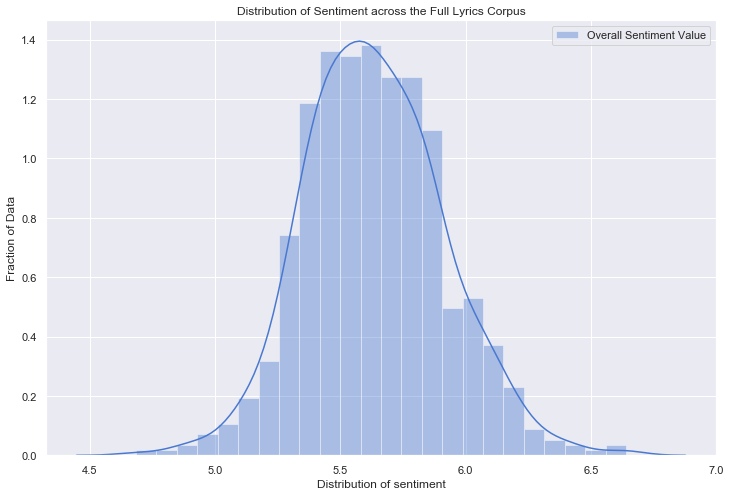

In [336]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
# rs = np.random.RandomState(10) <- CHANGED THAT!!

#Sentiment lists into numpy arrays
x1 = np.array(full_sentiment_list)

#Change figure dimensions
a4_dims = (12,8)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set(xlabel='Distribution of sentiment', ylabel='Fraction of Data')

#Plot a simple histogram with binsize determined automatically
sns.distplot(x1, ax=ax, color="b", label = "Overall Sentiment Value").set_title('Distribution of Sentiment across the Full Lyrics Corpus')

plt.legend()
plt.show()

The scale we use for sentiment is from 0 to 10: 0 is the most unhappy and 10 the happiest.

We observe that the sentiment distribution largely follows the normal distribution. Furthermore, songs tend to be concentrated between a sentiment of 5 to 6.5. That puts the overall sentiment of songs to be happy. Thus, if you open the radio on a random music channel you will hear (probability-wise) happier than sadder songs.

That concentration around 5.5 has also to do with our metric. Since we are not exclusively using a method to extract significance before sentiment, results are concentrated around 5, as a number of insignificant words skew our ratings.

#### Sentiments per genre

Getting sentiment per genre, is one step of abstraction lower than the sentiment of all songs.

Specificaly, to get the per genre distributions, we receieve the sentiments of each genre's artists' by aggregating the ratings of his/hers Top 10 songs. The total results of each artist inside a genre will give us the genre distribution. 

In that sense, this is sentiment per artist per genre. A more detailed overview can be provided having a per song per genre analysis, but this is not provided here.

We will try to plot, using the methods we already have for 3 genres: Hip Hop, Blues, Pop

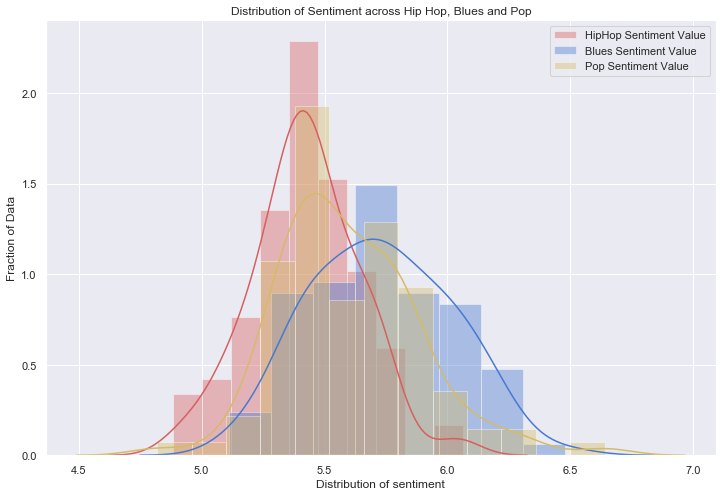

In [337]:
sns.set(style="darkgrid", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

#Sentiment lists into numpy arrays
x1 = np.array(genre_sentiment_dict['hip-hop'])
x2 = np.array(genre_sentiment_dict['blues'])
x3 = np.array(genre_sentiment_dict['pop'])

#Change figure dimensions
a4_dims = (12,8)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set(xlabel='Distribution of sentiment', ylabel='Fraction of Data')

#Plot a simple histogram with binsize determined automatically
sns.distplot(x1, ax=ax, color="r", label = "HipHop Sentiment Value")
sns.distplot(x2, ax=ax, color="b", label = "Blues Sentiment Value")
sns.distplot(x3, ax=ax, color="y", label = "Pop Sentiment Value")

plt.title('Distribution of Sentiment across Hip Hop, Blues and Pop')

plt.legend()
plt.show()

We quickly realise that the plots become unreadable. We have to devise to a different way of providing comparable results for all 7 genres. Of course, one can plot each distribution by itself (using the code above), but if the specific numbers of the axes are not of utmost importance, other solution can be found.

Thus, we turn to __Joy Plots__.

In [338]:
genre_sentiment_list_to_df = []
#create plotting pandas dataframe
for genre, genre_sentimental_list in genre_sentiment_dict.iteritems():
    for item in genre_sentimental_list:
        genre_sentiment_list_to_df.append({'genre': genre,
                                          'sent_value': item})

genre_sentiment_list_df = pd.DataFrame(genre_sentiment_list_to_df)

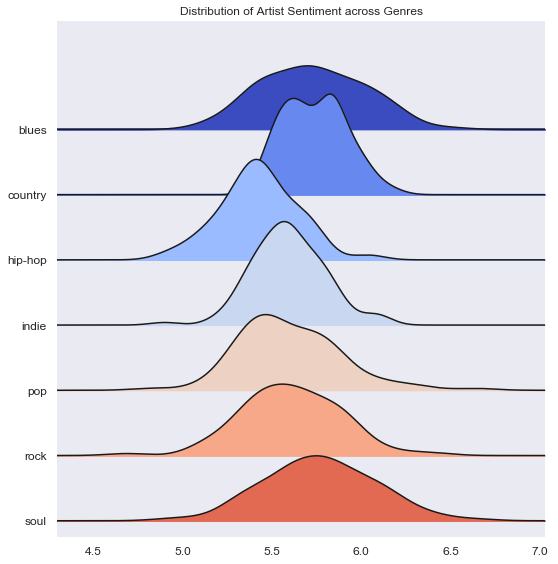

In [339]:
fig, axes = joypy.joyplot(genre_sentiment_list_df, by="genre", colormap=plt.get_cmap('coolwarm'), figsize = (8,8), title = "Distribution of Artist Sentiment across Genres")

Through this plot we can derive some interesting results:
- The __happiest__ genre in overall tones is __Country__: Its distribution is strongly above 5 with its main corpus of songs peaking near 6.
- The __saddest__ genre in overall tones is __Hip Hop__: Its distribution's peak is below 5.5 (a result comparable only with Pop, even though one would expect Pop to be the happiest of the genres), whilst it has significantly less percentage of its artists above a 5.7 rating
- The most __sentimentaly versatile__ genres are both __Blues__ and __Soul__: Both genres have an (in comparison) strong representation through their artists on the whole of the presented spectrum (<4.5 to 7.0)

#### Songs of misery and triumph
Below we will present the Top 10 Saddest and Top 10 Happiest songs of our whole song lyric corpus.

In [340]:
all_songs_list = []

for artist, artist_song_dict in full_text_analysis_dict.iteritems():
    artist_sentiment_list = []
    for song, song_dict in artist_song_dict.iteritems():
        all_songs_list.append((artist, song, song_dict['sentiment']))
        
sorted_by_sentiment = sorted(all_songs_list, key=lambda tup: tup[2])

print('Top 10 Saddest Songs - Total')
for song_tuple in sorted_by_sentiment[:10]:
    artists_songs_df = pd.read_csv('./topsters/songs_'+song_tuple[0]+'.csv')
    series = artists_songs_df.loc[artists_songs_df['Song_id'] == song_tuple[1]].values[0]
    artist_name = series[0]
    song_name = series[2]
    print("\t{} - {} - {}".format(artist_name, song_name, song_tuple[2]))

print('Top 10 Happiest Songs - Total')
for song_tuple in sorted_by_sentiment[-10:]:
    artists_songs_df = pd.read_csv('./topsters/songs_'+song_tuple[0]+'.csv')
    series = artists_songs_df.loc[artists_songs_df['Song_id'] == song_tuple[1]].values[0]
    artist_name = series[0]
    song_name = series[2]
    print("\t{} - {} - {}".format(artist_name, song_name,  song_tuple[2]))


Top 10 Saddest Songs - Total
	Becky G - Mayores - 3.1146213788
	Taylor Swift - Shake It Off - 3.60424948935
	Santana - Corazon Espinado (feat. Mana) - 3.78123767798
	DJ Snake - Magenta Riddim - 3.82654545455
	Shallou - Sigh - 3.844
	Jon Bellion - All Time Low - 3.90694841706
	21 Savage - Numb - 3.90759834075
	Arctic Monkeys - I Wanna Be Yours - 3.9629061719
	Kenny Wayne Shepherd - Everything Is Broken - 3.96553034608
	Becky G - Pienso en Ti - 3.97867015968
Top 10 Happiest Songs - Total
	Hunter Hayes - This Christmas - 7.37720729567
	Ty Segall - The Singer - 7.39535294118
	Dolly Parton - I Will Always Love You - 7.44144149832
	Jill Scott - It's Love - 7.45174613916
	Kasbo - Bara Du - 7.46944444444
	Bill Withers - Lovely Day - 7.47689959095
	Lady Antebellum - A Holly Jolly Christmas - 7.52105416667
	Michael Bubl - Holly Jolly Christmas - 7.5676252588
	Childish Gambino - Summertime Magic - 7.64947570948
	The Yardbirds - For Your Love - 7.76006526826


The analysis of those results is very interesting.

In regards to sad songs each result can give us informative feedback on how our approach worked out:
- __Almost lyricless (or at least recognised as so)__: Inside the Top10S (Top 10 Saddest) exists a number of songs which lack lyrics _almost_ completely (like [Shallou - Sigh](https://genius.com/Shallou-sigh-lyrics), 10 words in total - more of a haiku than a song), or are in a language (here Spanish or, probably, Hindi) which cannot be recognised. In the latter situation, a few words that happen to also exist in English are recognised and the sentiment is derived from that. Examples for that are: Becky G - Mayores, Santana - Corazon Espinado (feat. Mana), Becky G - Pienso en Ti and DJ Snake - Magenta Riddim (which has lyrics in what we recognize as probably Hindi but could be gibberish, ecuse our ignorance). Especially the last example illustrates this perfectly: [DJ Snake - Magenta Riddim](https://genius.com/Dj-snake-magenta-riddim-lyrics), includes one line, that reads: `Pig gam ba li, de la pig gam ba li ba` and is repeated multiple times inside the song. The word `pig` is recognised and, having a low rating, it forces the song to the Top10S.
- __Negation__: In other results inside the Top10S, lyrics include a grammatic negation that is not effectively recognized. This happens in both: Taylor Swift - Shake It Off  and Arctic Monkeys - I Wanna Be Yours, where negative words are themselves negated, resulting in a more positive tone in the song than the rating given.

In regards to happy songs we can reach to the following conclusions:
- __Negation__: We recognize the inability of our algorithm to recognize the negation of positive terms. It's important to note that this negation is not only grammatical (the inclusion of a 'not' term in front of a positive term) but can also be conceptual. In such a way sentences like `"I want to love you but you won't let me` are very hard to interpret with our current tools. Thus, sad songs can reach the Top 10 Happy (Top10H) chart, like: Ty Segall - The Singer, Dolly Parton - I Will Always Love You, Kasbo - Bara Du
- __Christmas and Hapiness__: Many songs of the Top10H are Christmas songs. This has a lot to say about the content of those songs and the joyous climate we will soon experience (as this written in Dec 2018). Some examples are: Hunter Hayes - This Christmas, Lady Antebellum - A Holly Jolly Christmas and Michael Bubl - Holly Jolly Christmas
- __Lovely Day__: We just want to note down that _Bill Withers - Lovely Day_ is a beautiful song and we suggest you give it a listen :)

Additionaly to the conclusions above, one can recognize that in both Top10S and Top10H's correct entries, the thematology is very romanticaly centric. Sad songs talk about break-ups or failures confessed to a loved one (Jon Bellion - All Time Low, Kenny Wayne Shepherd - Everything Is Broken etc.) while happy songs profess their love and find it to be reciprocal (Jill Scott - It's Love, Childish Gambino - Summertime Magic etc.). Exceptions to that in Top10H are the Christmas songs which are all jolly by themselves.

If one changes the code to find the Top20S and Top20H, he/she will find the same themes to be repeated as in the Top 10s.

Sequentialy it would be of interest to compare the current sentimental results with those of musical similarity retrieved in another time during our research and see how they stack up against each other. Using both results and polling them with people we can see which one is more important for the sentiment of a song: lyrics or music.

Finally it would be interesting to have an analysis without aggregated sentiment results from Hedonometer, TextBlob and SenticNet5, but one based on each metric to see which one performs best based on the outputted Top 10 results.

#### JoyPlots: A small tribute
The retrieve a sentiment distributions graph that made sense we resorted to Joy Plots. These plots, apparently took their name from the iconic album cover of __Joy Division's Unknown Pleasures__ album ([Source](https://blog.revolutionanalytics.com/2017/07/joyplots.html)). The album cover is presented below:

![title](img/jp.png)

As a tribute to the great band, great album and great people that came up with this vizualization, we will plot the distribution of song sentiment of each artist inside Rock (the closest we have to Joy Division's genre, Punk), to something that will hopefully look similar to you.

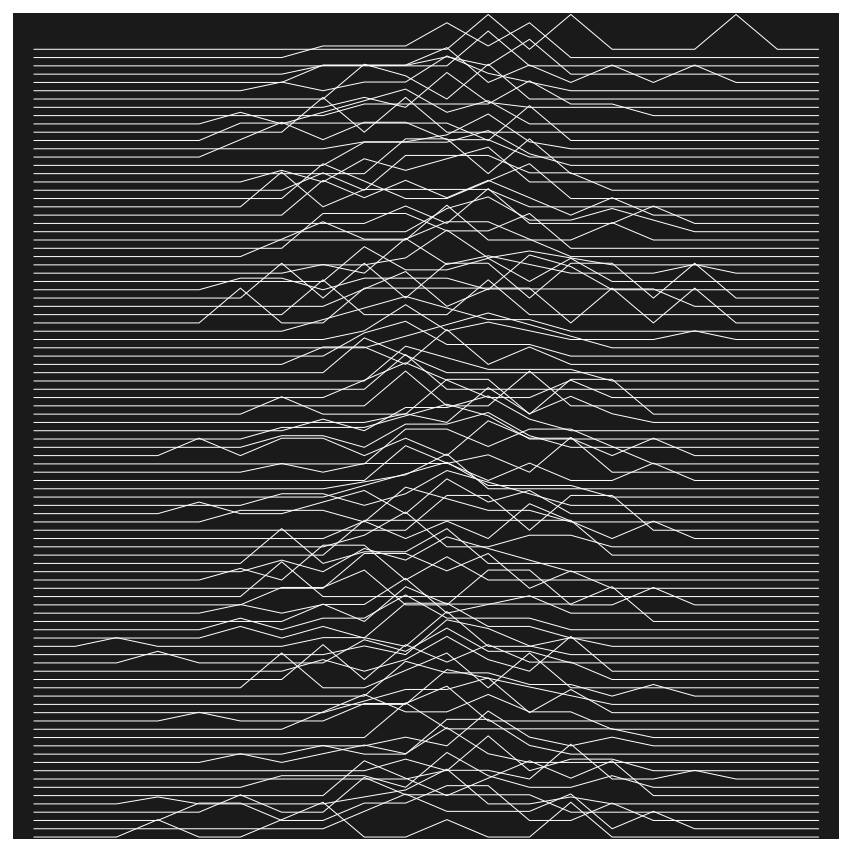

In [341]:
# rock_sentiment_df = genre_sentiment_list_df[genre_sentiment_list_df['genre'] == 'rock']
rock_sentiment_list_to_df = []

for index, row in artists_df.iterrows():
    artist_id = row['Artist_id']
    artist_genre = row['Genre']
    try:
        if (artist_genre == 'rock'):
            for song_sentiment in artist_sentiment_keep_dict[artist_id]:
                rock_sentiment_list_to_df.append({'artist': artist_id, 'sent_value': song_sentiment})
    except:
        pass
rock_sentiment_df = pd.DataFrame(rock_sentiment_list_to_df)


fig, axes = joypy.joyplot(rock_sentiment_df,by="artist", ylim='own', ylabels=False, xlabels=False,
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=0.5, figsize=(12,12),kind="counts", bins = 20)

# plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
# for a in axes[:-1]:
#     a.set_xlim([3,8])

### Count (on) my words
Having introduced Joy Plots, we continue to plot: This time we focus on a __word count distribution__ per song, presented by genre.

In [342]:
genre_word_count_list_to_df = []
for genre, genre_word_count_list in genre_word_count_dict.iteritems():
    for item in genre_word_count_list:
        genre_word_count_list_to_df.append({'genre': genre,
                                          'word_count': item})

genre_word_count_list_df = pd.DataFrame(genre_word_count_list_to_df)

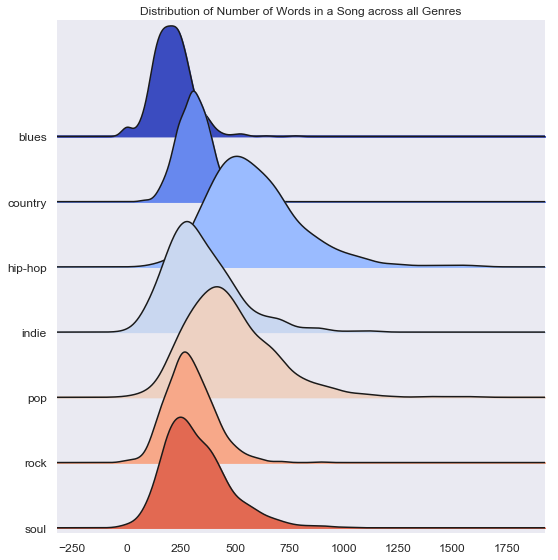

In [343]:
fig, axes = joypy.joyplot(genre_word_count_list_df, by="genre", ylim='own', colormap=plt.get_cmap('coolwarm'),  figsize = (8,8), title = "Distribution of Number of Words in a Song across all Genres")

The peak results we receive are expeceted based on the `Average Number of words per song per genre` presented above. Consequently we can derive a few more results from the graph above:
- The __most diverse__ genre in terms of length is __Hip Hop__: Starting from around 200 words, Hip-Hop songs can go up to more than 1000 words, featuring the ties the genre can have to Spoken Word.
- The __least diverse__ genre is __Country__: It seems that songwriters of this genre are not necesarilly more laconic, but seem to follow a tested and successful recipe as far as the length of the songs is concerned.
- Once more we recognise __a correlation__ between Pop's and Hip Hop's results.

### Parental advisory: An Explicitness Analysis
Below, we will analyse __Explicitness__: _how many and which swear words are used inside the songs of each genre_.

Having plotted the results multiple times, we resulted in restraining them to the swear words that were __used more than 300 times__ throughout the whole song lyric corpus. This is hard coded but can be changed in the code below.

We recommend to readers to proceed with care: A number of explicit words are presented in our charts below.

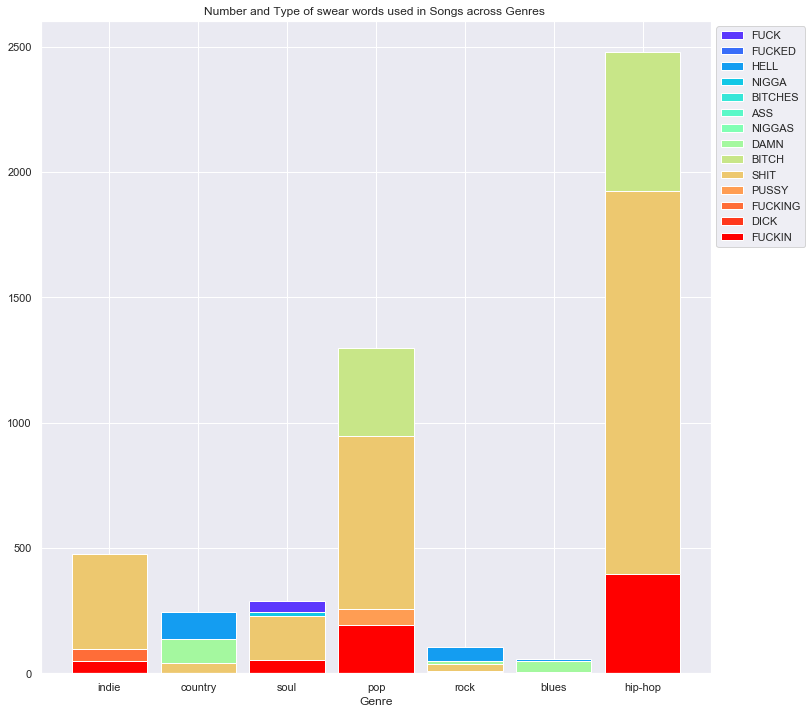

In [344]:
#heavily inspired by https://python-graph-gallery.com/13-percent-stacked-barplot/
# r -> categories
# names -> genre_to_plot_category_list

# swear_list_dict includes a list for every swear which in index n holds the number the swear comes up in genre n

#r = [0,1,2,3,4]
plt.figure(figsize=[12,12])
r = categories
barWidth = 0.85
names = tuple(genre_to_plot_category_list)

colormap = plt.cm.get_cmap('rainbow')

#count how many swear words you have
#show those with more than 300 instances over all genres
meaningful_limit = 300 # <-- Change how many times the swear word needs to exist in the whole corpus to be analysed
total_swear_count = 0
for swear in swear_list_dict.keys():
    if (sum(swear_list_dict[swear]) > meaningful_limit):
        total_swear_count += 1

current_count = 0
for swear in swear_list_dict.keys():
    if (sum(swear_list_dict[swear]) > meaningful_limit):
        current_count += 1
        rgba = colormap(current_count/float(total_swear_count))
        plt.bar(r, swear_list_dict[swear], color = rgba, edgecolor='white', width=barWidth, label = swear)

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Genre")

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.title('Number and Type of swear words used in Songs across Genres ')
 
# Show graphic
plt.show()

We analyse the results above:
- __King of Swears__: __Hip-Hop__ is again the undisputed winner. In a total of less than 1000 songs, almost 2500 swear words where used. The genre does not seem to have a large amount of swearing vocabulary, concetrating its impressive numbers into three swear words.
- The __most creative__ in the use of swear words, are both __Soul__ and __Pop__ concentrating their results in 4 swear words.
- The __least creative__ would be __Blues__ having only two swear words on its current catalogue.

It is important to note that those results will change dramatically in terms of creativity, if the number of occurances is lowered. The more this limit is lowered, the more words are let in and when it drops to just 1, we find out that __Rock__ has the most comprehensive catalogue of swear words used.

### Hidden Commercials: A Brand Analysis
Below we will look into how and if brands are mentioned inside the songs of a genre.

We will do this representation by utilizing Joint Plots. These plots are used to calculate a [Kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation), but here we are using them to vizualize the amount of brands of a category that are mentioned inside the song lyric corpus of a genre.

[Text(0,0,'auto'),
 Text(0,0.2,'global'),
 Text(0,0.4,'fashion'),
 Text(0,0.6,'spirit'),
 Text(0,0.8,'tobacco')]

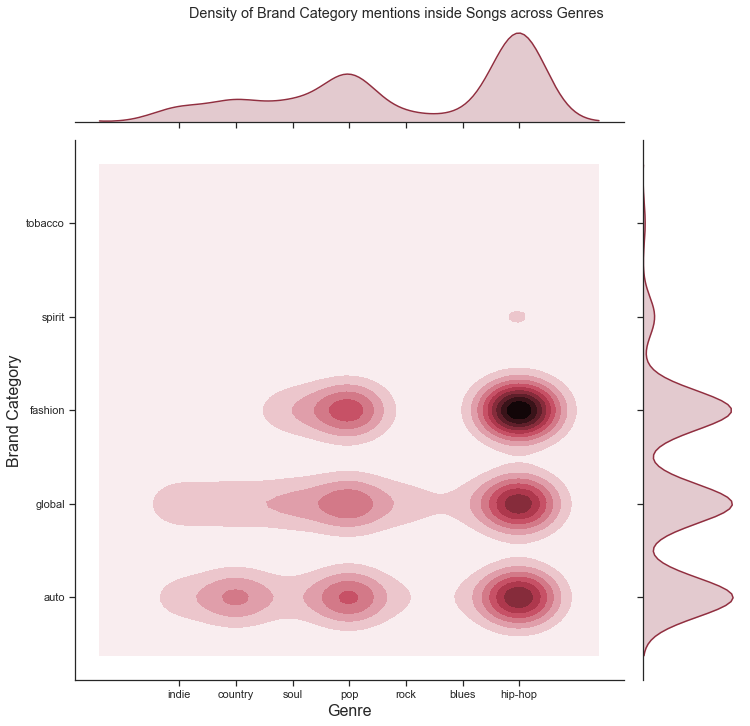

In [345]:
sns.set(style="ticks")

x = np.array(xy[0])
y = np.array(xy[1])

jp = sns.jointplot(x, y, kind="kde", color="#912f40", height = 10)


jp.set_axis_labels('Genre', 'Brand Category', fontsize=16)
jp.ax_joint.set_xticks(categories)
jp.ax_joint.set_xticklabels(genre_to_plot_category_list)

plt.subplots_adjust(top=0.95)
jp.fig.suptitle('Density of Brand Category mentions inside Songs across Genres') 
jp.ax_joint.set_yticks(brand_categories)
jp.ax_joint.set_yticklabels(brand_to_plot_category_list)


The results are, once again, very interesting:
- __Choosing the medium__: Not all categories of brands come up in the plot. Tobacco brands seem to have no representation (it would be interesting to see if this would be the case for songs before 2000, where smoking was more socially widespread). Spirit brands are also absent, apart from a small representation in Hip- Hop. At the same time, brands from other categories come up more frequently. That is specifically true for Fashion, Auto (Car) and Global brands. 
- __Participation denial__: Also, not all genres include brand mentions. In particular, Indie and Soul seem to have far less mentions, where Rock and Blues, almost none.
- __The Advertiser__: __Hip-Hop__ is the genre that mentions brands the most. It is evident that the difference between it and the other genres is big. The most advertised through Hip-Hop songs, are Fashion brands, with Auto brands a close second. It would be an interesting second step to see how many of these brands offer luxurious items and how many do not. Finally, once again we see the evidence of a correlation between __Pop__ and __Hip Hop__, now in terms of brandss mentioned in lyrics. __Pop__ is the second with most mentions of brands.
- __A Trusted Pal__: It is interesting to observe that Country songs generaly abstain from mentioning brands with the sole exception of Auto brands. This doesn't come as a surprise, as words like tailgate, truck, tractor where part of the TF-IDF wordcloud. 

# Discussions and conclusions
- What we've done right: We consider the analysis of text to be significantly robust in this project. Our goal was to provide the tools, dataset and conclusions to provide a basis for meaningful discussion. Through this part of the research project, we have defined a lexicon that can be effectively used in extensions and additions whilst preserving a theoretical complecency with previous results. Apart from that, we are proud of the versatility of tools used to arrive in those results. We didn't limit ourselves to one solution but experimented with multiple ones (especially in mining data and sentiment analysis) whilst at the same time, created versatile Pandas dataframes and dictionaries that can be used in the future. We have tried to make the most out of the plotting capabilities that Python provides us with Matplotlib, Seaborn and JoyPy.  
- What we haven't done: We divide this section on the things that could be better and the ones that can be future additions:
    - Could be better: We would have liked to have less dictionaries and more use of Pandas Dataframes, due to their indexing capabilities. We would have also liked to present a few interactive plots: the API to do that is very simple with plot.ly. We started our project with high hopes. We wanted to analyse as many as 150,000 total songs - an estimated number for the whole catalogue of all artists in the Top 700. A function to fetch the lyrics of those songs is implemented but the fetching of that data would be a __bottleneck__ for our project. The API calls and HTTP requests are very time consuming and fetching that data would take from days to weeks.
    - Future additions: 
        - Adding more genres into the analysis
        - Use mean and standard deviation to find negative and positive songs (this has not been done here, since it was part of previous assignments this semester) and do all sorts of cool things with the statistics
        - Make wordclouds from all songs of an artist with illustrative examples
        - Split songs in 3 parts - intro, middle part and final. Find words that exist in those parts: see their sentiment and find if they have certain characteristics
        - Use titles to see if they have special features and if they represent sentiment adequately
        - Mine Wikipedia (or discogs.com or rym.com) to find release dates for albums. See if they have special lexical characteristics and plot distribution of sentiment over time
        - Text analyse collaborations and see if they have differences in sentiment
        - Use datasets ('god', 'holly', 'sacred', ...) to find out how deity/religious-heavy each genre is 
        - Use datasets ('brother', 'sister', 'family', ...) to find out how family themed each genre is
        - Use datasets ('home', 'homeland', 'America', ...) to find out how patrioticaly themed each genre is

### IPython Libraries
These are the libraries and the respective versions of each one of them. 

If you experience any issues when running this example you can easily create a new Python 2 environment and, based on the information below, build a requirements.txt file to use with `pip install`

In [ ]:
asn1crypto==0.24.0
azlyrics==1.3.2
backports-abc==0.5
backports.functools-lru-cache==1.5
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.3
certifi==2018.10.15
cffi==1.11.5
chardet==3.0.4
colorama==0.3.9
cryptography==2.3.1
cycler==0.10.0
Cython==0.28.5
decorator==4.3.0
enum34==1.1.6
fa2==0.2
functools32==3.2.3.post2
futures==3.2.0
idna==2.7
ipaddress==1.0.22
ipykernel==4.10.0
ipython==5.8.0
ipython-genutils==0.2.0
joypy==0.1.10
jsonschema==2.6.0
jupyter-client==5.2.3
jupyter-core==4.4.0
kiwisolver==1.0.1
lxml==4.2.5
lyricwikia==0.1.9
matplotlib==2.2.3
mkl-fft==1.0.6
nbformat==4.4.0
networkx==2.1
nltk==3.3
numpy==1.15.2
pandas==0.23.4
pathlib2==2.3.2
patsy==0.5.1
pickleshare==0.7.4
Pillow==5.3.0
plotly==3.3.0
prompt-toolkit==1.0.15
pycparser==2.18
Pygments==2.2.0
pyOpenSSL==18.0.0
pyparsing==2.2.0
PySocks==1.6.8
python-dateutil==2.7.3
python-louvain==0.11
pytz==2018.5
pyzmq==17.1.2
requests==2.19.1
retrying==1.3.3
scandir==1.9.0
scipy==1.1.0
seaborn==0.9.0
selenium==3.14.0
simplegeneric==0.8.1
singledispatch==3.4.0.3
six==1.11.0
spotipy==2.4.4
statsmodels==0.9.0
textblob==0.15.2
tornado==5.1
tqdm==4.26.0
traitlets==4.3.2
urllib3==1.23
wcwidth==0.1.7
win-inet-pton==1.0.1
win-unicode-console==0.5
wincertstore==0.2
wordcloud==1.5.0